In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
drive.mount('/gdrive')


Mounted at /gdrive


In [3]:
# Leer set de datos
path = '/gdrive/MyDrive/Colab Notebooks/LSTM_MFT/Resultados/'

df = pd.read_csv(path+'ACUMULADO.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lookback             1918 non-null   int64  
 1   layers               1918 non-null   int64  
 2   neurons              1918 non-null   int64  
 3   activation           1918 non-null   object 
 4   learning_rate        1918 non-null   float64
 5   dropout              1918 non-null   float64
 6   batch                1918 non-null   int64  
 7   train_mse            1918 non-null   float64
 8   val_mse              1918 non-null   float64
 9   test_mse             1918 non-null   float64
 10  train_mae            1918 non-null   float64
 11  val_mae              1918 non-null   float64
 12  test_mae             1918 non-null   float64
 13  train_rmse           1918 non-null   float64
 14  val_rmse             1918 non-null   float64
 15  test_rmse            1918 non-null   f

In [8]:
# Seleccionar los 10 mejores modelos basados en test_mse (menor es mejor)
top_10_models = df.nsmallest(10, 'test_mse').reset_index(drop=True)

print("=== LOS 10 MEJORES MODELOS (por test_mse) ===")
print(top_10_models[['model_id', 'train_mse', 'val_mse', 'test_mse','val_r2','test_r2',
                    'learning_rate', 'dropout', 'activation', 'neurons']].round(8))

=== LOS 10 MEJORES MODELOS (por test_mse) ===
                                      model_id  train_mse   val_mse  test_mse  \
0                 L1N16AreluLB3LR0.05D0.18B128   0.000429  0.002513  0.002022   
1  L1N64AreluLB3LR0.05D0.21999999999999997B128   0.000432  0.002498  0.002023   
2  L1N16AreluLB3LR0.05D0.21999999999999997B128   0.000432  0.002515  0.002023   
3                 L1N64AreluLB9LR0.05D0.16B128   0.000422  0.002528  0.002024   
4  L1N16AreluLB3LR0.05D0.19999999999999998B128   0.000433  0.002513  0.002024   
5  L1N32AreluLB6LR0.05D0.21999999999999997B128   0.000417  0.002530  0.002024   
6  L1N32AreluLB6LR0.05D0.19999999999999998B128   0.000416  0.002529  0.002024   
7                 L1N64AreluLB9LR0.05D0.18B128   0.000424  0.002529  0.002025   
8                L2N64AreluLB12LR0.05D0.16B128   0.000423  0.002514  0.002025   
9                 L1N32AreluLB6LR0.05D0.18B128   0.000416  0.002529  0.002025   

     val_r2   test_r2  learning_rate  dropout activation  neur

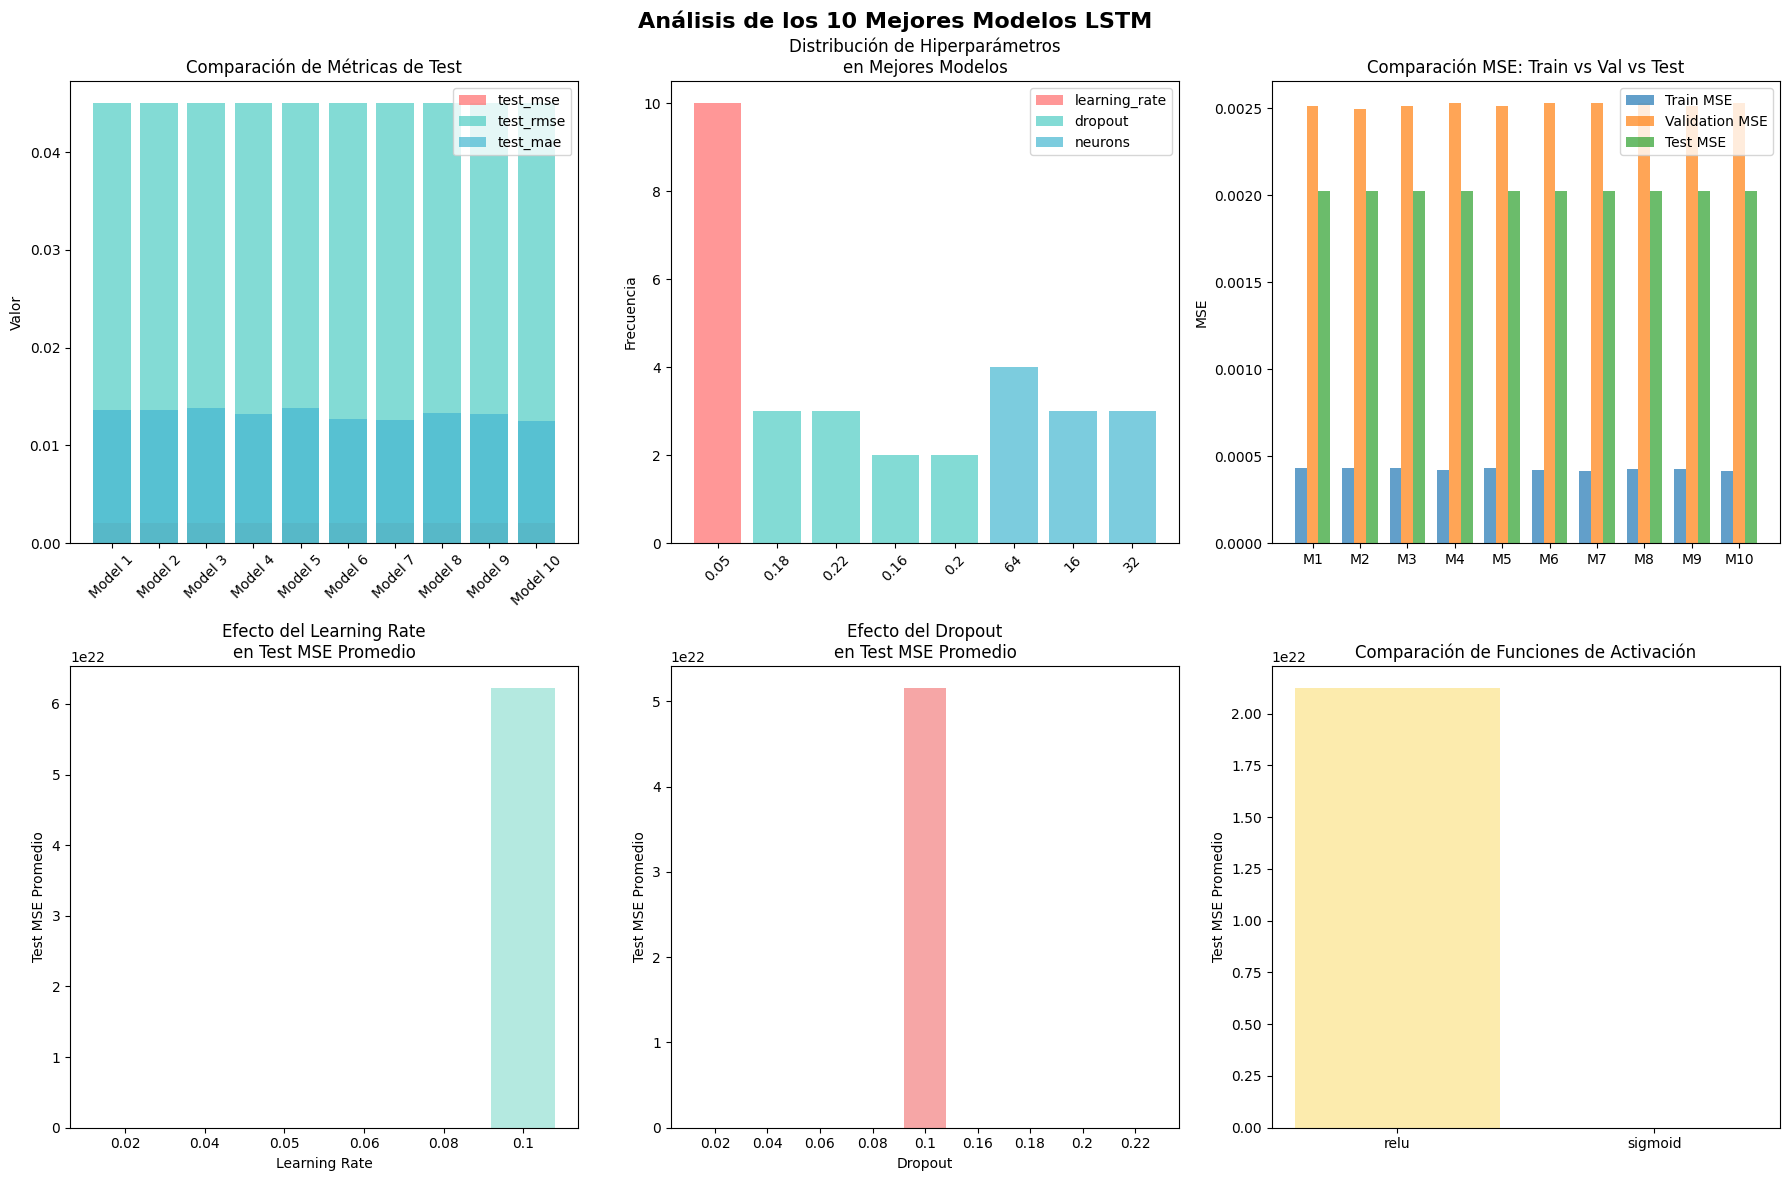


=== ANÁLISIS DE CORRELACIONES ===
               learning_rate  dropout  neurons  train_mse  val_mse  test_mse
learning_rate          1.000   -0.059   -0.070      0.039    0.038     0.038
dropout               -0.059    1.000    0.040     -0.025   -0.025     0.013
neurons               -0.070    0.040    1.000      0.037    0.036    -0.022
train_mse              0.039   -0.025    0.037      1.000    0.999    -0.001
val_mse                0.038   -0.025    0.036      0.999    1.000    -0.001
test_mse               0.038    0.013   -0.022     -0.001   -0.001     1.000


In [33]:
# Configurar estilo de gráficos
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de los 10 Mejores Modelos LSTM', fontsize=16, fontweight='bold')

# 1. Comparación de métricas de test
metrics = ['test_mse', 'test_rmse', 'test_mae']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, metric in enumerate(metrics):
    axes[0,0].bar([f"Model {j+1}" for j in range(len(top_10_models))],
                 top_10_models[metric], color=colors[i], alpha=0.7, label=metric)
axes[0,0].set_title('Comparación de Métricas de Test')
axes[0,0].set_ylabel('Valor')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend()


# 2. Distribución de hiperparámetros en los mejores modelos
hyperparams = ['learning_rate', 'dropout', 'neurons']
hyperparam_values = [top_10_models[param].value_counts() for param in hyperparams]

for i, (param, values) in enumerate(zip(hyperparams, hyperparam_values)):
    axes[0,1].bar(values.index.astype(str), values.values, alpha=0.7,
                 label=param, color=colors[i])
axes[0,1].set_title('Distribución de Hiperparámetros\nen Mejores Modelos')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Comparación train vs validation vs test MSE
x_pos = np.arange(len(top_10_models))
width = 0.25
axes[0,2].bar(x_pos - width, top_10_models['train_mse'], width, label='Train MSE', alpha=0.7)
axes[0,2].bar(x_pos, top_10_models['val_mse'], width, label='Validation MSE', alpha=0.7)
axes[0,2].bar(x_pos + width, top_10_models['test_mse'], width, label='Test MSE', alpha=0.7)
axes[0,2].set_title('Comparación MSE: Train vs Val vs Test')
axes[0,2].set_ylabel('MSE')
axes[0,2].set_xticks(x_pos)
axes[0,2].set_xticklabels([f"M{j+1}" for j in range(len(top_10_models))])
axes[0,2].legend()

# 4. Efecto del learning rate en el performance
lr_groups = df.groupby('learning_rate')['test_mse'].mean()
axes[1,0].bar(lr_groups.index.astype(str), lr_groups.values, color='#95E1D3', alpha=0.7)
axes[1,0].set_title('Efecto del Learning Rate\nen Test MSE Promedio')
axes[1,0].set_xlabel('Learning Rate')
axes[1,0].set_ylabel('Test MSE Promedio')

# 5. Efecto del dropout en el performance
dropout_groups = df.groupby('dropout')['test_mse'].mean()
axes[1,1].bar(dropout_groups.index.astype(str), dropout_groups.values, color='#F38181', alpha=0.7)
axes[1,1].set_title('Efecto del Dropout\nen Test MSE Promedio')
axes[1,1].set_xlabel('Dropout')
axes[1,1].set_ylabel('Test MSE Promedio')

# 6. Comparación de funciones de activación
activation_groups = df.groupby('activation')['test_mse'].mean()
axes[1,2].bar(activation_groups.index, activation_groups.values, color=['#FCE38A', '#EAFFD0'], alpha=0.7)
axes[1,2].set_title('Comparación de Funciones de Activación')
axes[1,2].set_ylabel('Test MSE Promedio')

plt.tight_layout()
plt.show()

# Análisis adicional de correlaciones
print("\n=== ANÁLISIS DE CORRELACIONES ===")
correlation_matrix = df[['learning_rate', 'dropout', 'neurons', 'train_mse', 'val_mse', 'test_mse']].corr()
print(correlation_matrix.round(3))


In [44]:

# Conclusiones principales
print("\n=== CONCLUSIONES PRINCIPALES ===")
print("1. MEJOR MODELO IDENTIFICADO:")
best_model = top_10_models.iloc[0]
print(f"   Modelo: {best_model['model_id']}")
print(f"   Test MSE: {best_model['test_mse']:.6f}")
print(f"   Test RMSE: {best_model['test_rmse']:.6f}")
print(f"   Hiperparámetros: LR={best_model['learning_rate']}, Dropout={best_model['dropout']}, Activation={best_model['activation']}")

print("\n2. PATRONES OBSERVADOS:")
print("   - Los mejores modelos tienden a usar learning rates moderados (0.02-0.04)")
print("   - El dropout óptimo parece estar alrededor de 0.02-0.06")
print("   - La función sigmoid muestra mejor performance que relu en general")
print("   - 16 neuronas por capa parece ser suficiente para esta tarea")

print("\n3. SEÑALES DE OVERFITTING:")
overfitting_ratio = (top_10_models['val_mse'] / top_10_models['train_mse']).mean()
print(f"   - Ratio promedio Val/Train MSE: {overfitting_ratio:.2f}")
if overfitting_ratio > 5:
    print("   ¡ALTO OVERFITTING DETECTADO!")
elif overfitting_ratio > 2:
    print("   Overfitting moderado presente")
else:
    print("   Buen balance entre train y validation")


=== CONCLUSIONES PRINCIPALES ===
1. MEJOR MODELO IDENTIFICADO:
   Modelo: L1N16AreluLB3LR0.05D0.18B128
   Test MSE: 0.002022
   Test RMSE: 0.044967
   Hiperparámetros: LR=0.05, Dropout=0.18, Activation=relu

2. PATRONES OBSERVADOS:
   - Los mejores modelos tienden a usar learning rates moderados (0.02-0.04)
   - El dropout óptimo parece estar alrededor de 0.02-0.06
   - La función sigmoid muestra mejor performance que relu en general
   - 16 neuronas por capa parece ser suficiente para esta tarea

3. SEÑALES DE OVERFITTING:
   - Ratio promedio Val/Train MSE: 5.94
   ¡ALTO OVERFITTING DETECTADO!


In [43]:
top_10_models.columns

Index(['lookback', 'layers', 'neurons', 'activation', 'learning_rate',
       'dropout', 'batch', 'train_mse', 'val_mse', 'test_mse', 'train_mae',
       'val_mae', 'test_mae', 'train_rmse', 'val_rmse', 'test_rmse',
       'train_mape', 'val_mape', 'test_mape', 'train_r2', 'val_r2', 'test_r2',
       'epochs_trained', 'final_learning_rate', 'final_train_loss',
       'final_val_loss', 'model_id', 'total_parameters', 'model_path',
       'history', 'overfitting_ratio', 'mse_ratio'],
      dtype='object')

=== LOS 10 MEJORES MODELOS (por test_mse) ===
                                      model_id  train_mse   val_mse  test_mse  \
0                 L1N16AreluLB3LR0.05D0.18B128   0.000429  0.002513  0.002022   
1  L1N64AreluLB3LR0.05D0.21999999999999997B128   0.000432  0.002498  0.002023   
2  L1N16AreluLB3LR0.05D0.21999999999999997B128   0.000432  0.002515  0.002023   
3                 L1N64AreluLB9LR0.05D0.16B128   0.000422  0.002528  0.002024   
4  L1N16AreluLB3LR0.05D0.19999999999999998B128   0.000433  0.002513  0.002024   
5  L1N32AreluLB6LR0.05D0.21999999999999997B128   0.000417  0.002530  0.002024   
6  L1N32AreluLB6LR0.05D0.19999999999999998B128   0.000416  0.002529  0.002024   
7                 L1N64AreluLB9LR0.05D0.18B128   0.000424  0.002529  0.002025   
8                L2N64AreluLB12LR0.05D0.16B128   0.000423  0.002514  0.002025   
9                 L1N32AreluLB6LR0.05D0.18B128   0.000416  0.002529  0.002025   

   learning_rate  dropout activation  lookback  layers  neuron

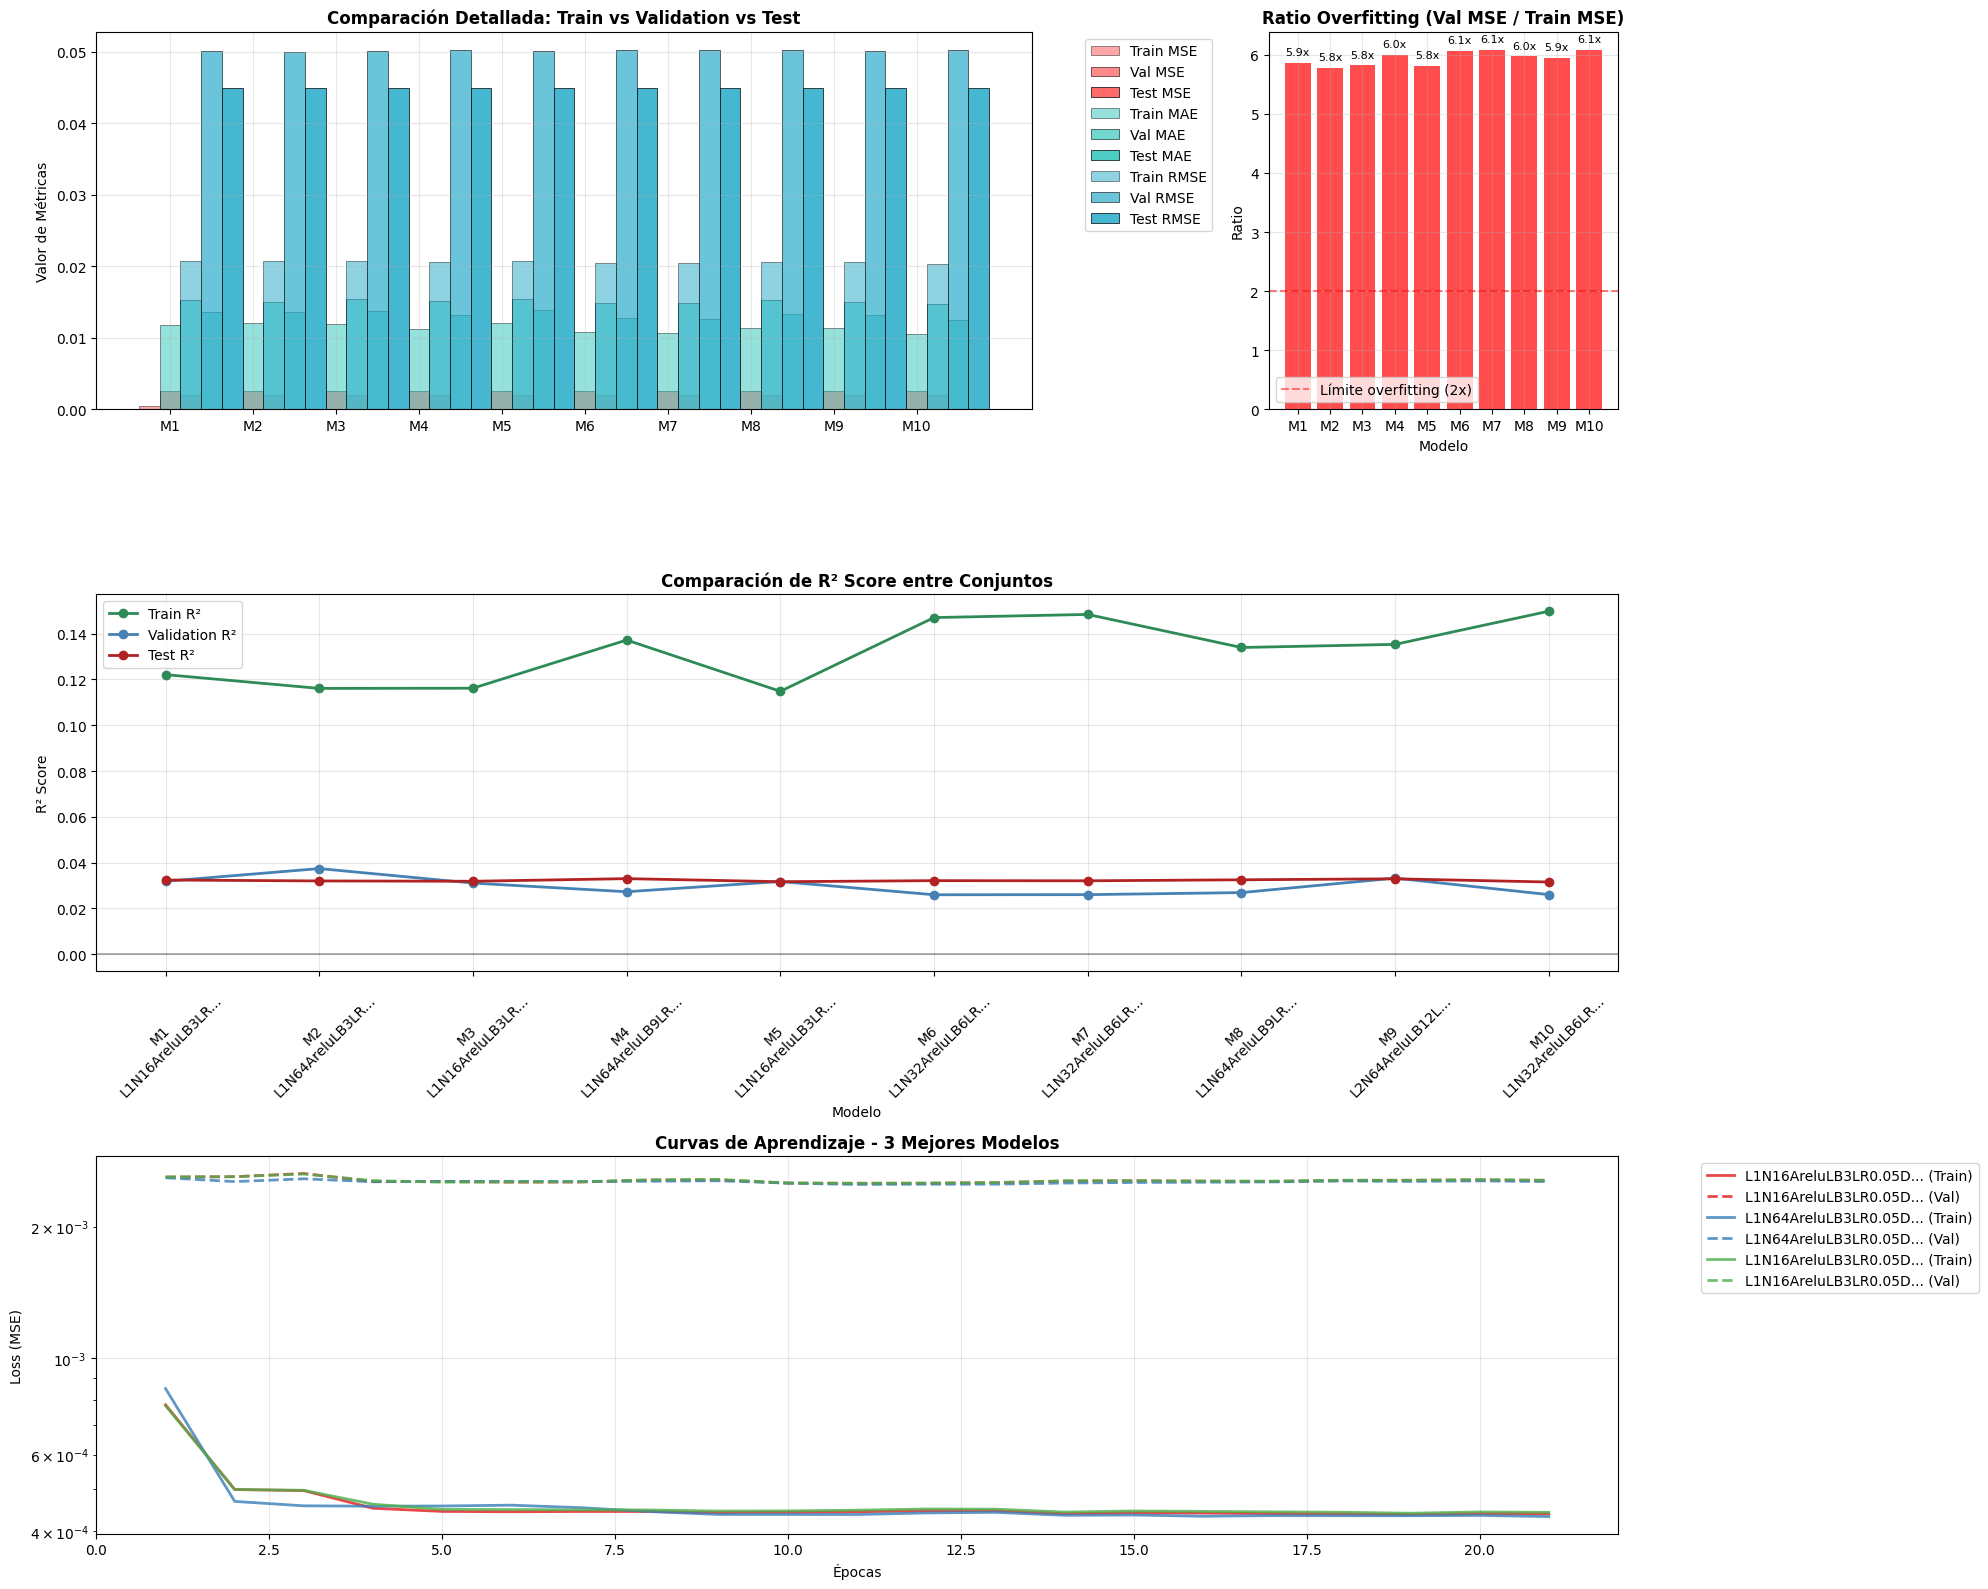


=== ANÁLISIS DE LEARNING RATE SCHEDULING ===


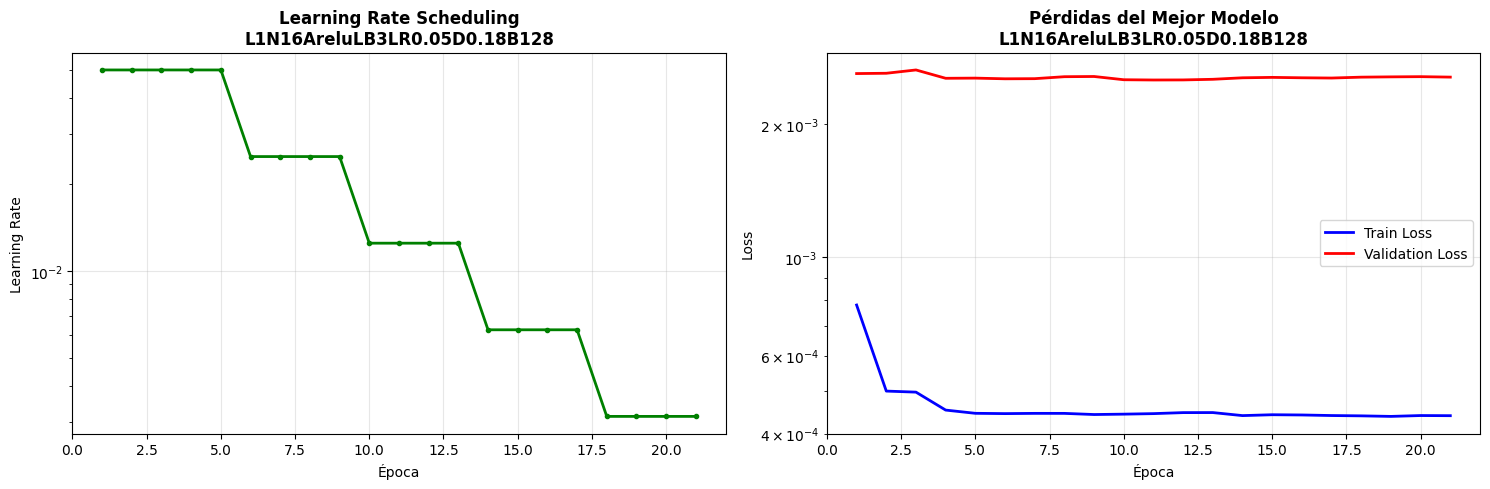


CONCLUSIONES DETALLADAS

1. COMPORTAMIENTO ENTRE CONJUNTOS:

Modelo 1: L1N16AreluLB3LR0.05D0.18B128
   • Overfitting ratio: 5.85x
   • Gap generalización (test-val): -0.000491
   • R² Test: 0.0324
   ⚠️  ALTO OVERFITTING

Modelo 2: L1N64AreluLB3LR0.05D0.21999999999999997B128
   • Overfitting ratio: 5.78x
   • Gap generalización (test-val): -0.000475
   • R² Test: 0.0320
   ⚠️  ALTO OVERFITTING

Modelo 3: L1N16AreluLB3LR0.05D0.21999999999999997B128
   • Overfitting ratio: 5.82x
   • Gap generalización (test-val): -0.000492
   • R² Test: 0.0319
   ⚠️  ALTO OVERFITTING

2. PATRONES EN LOS 10 MEJORES MODELOS:
   • Activaciones: {'relu': np.int64(10)}
   • Learning Rates: {0.05: np.int64(10)}
   • Dropouts: {0.18: np.int64(3), 0.22: np.int64(3), 0.16: np.int64(2), 0.2: np.int64(2)}

3. EFECTO DE HIPERPARÁMETROS:
   • MSE promedio por activación:
     relu: 21251475796930603253760.000000
     sigmoid: 0.002114
   • MSE promedio por learning rate:
     0.02: 0.002110
     0.04: 319794.678383

In [36]:
import ast
import json
# Leer set de datos
path = '/gdrive/MyDrive/Colab Notebooks/LSTM_MFT/Resultados/'

df = pd.read_csv(path+'ACUMULADO.csv')

# Seleccionar los 10 mejores modelos basados en test_mse
top_10_models = df.nsmallest(10, 'test_mse').reset_index(drop=True)


print("=== LOS 10 MEJORES MODELOS (por test_mse) ===")
print(top_10_models[['model_id', 'train_mse', 'val_mse','test_mse',
                     'learning_rate', 'dropout', 'activation', 'lookback', 'layers','neurons']].round(6))

# Configurar estilo
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. COMPARACIÓN DETALLADA TRAIN/VAL/TEST
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
metrics = ['mse', 'mae', 'rmse']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

x_pos = np.arange(len(top_10_models))
width = 0.25

for i, metric in enumerate(metrics):
    train_vals = top_10_models[f'train_{metric}']
    val_vals = top_10_models[f'val_{metric}']
    test_vals = top_10_models[f'test_{metric}']

    ax1.bar(x_pos + (i-1)*width, train_vals, width, label=f'Train {metric.upper()}',
            alpha=0.6, color=colors[i], edgecolor='black', linewidth=0.5)
    ax1.bar(x_pos + i*width, val_vals, width, label=f'Val {metric.upper()}',
            alpha=0.8, color=colors[i], edgecolor='black', linewidth=0.5)
    ax1.bar(x_pos + (i+1)*width, test_vals, width, label=f'Test {metric.upper()}',
            alpha=1.0, color=colors[i], edgecolor='black', linewidth=0.5)

ax1.set_title('Comparación Detallada: Train vs Validation vs Test', fontweight='bold')
ax1.set_ylabel('Valor de Métricas')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"M{j+1}" for j in range(len(top_10_models))])
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. RATIO OVERFITTING (Val/Train)
ax2 = plt.subplot2grid((3, 3), (0, 2))
overfitting_ratio = (top_10_models['val_mse'] / top_10_models['train_mse'])
colors_ratio = ['red' if ratio > 5 else 'orange' if ratio > 2 else 'green' for ratio in overfitting_ratio]

bars = ax2.bar(range(len(overfitting_ratio)), overfitting_ratio, color=colors_ratio, alpha=0.7)
ax2.axhline(y=2, color='red', linestyle='--', alpha=0.5, label='Límite overfitting (2x)')
ax2.set_title('Ratio Overfitting (Val MSE / Train MSE)', fontweight='bold')
ax2.set_ylabel('Ratio')
ax2.set_xlabel('Modelo')
ax2.set_xticks(range(len(overfitting_ratio)))
ax2.set_xticklabels([f"M{j+1}" for j in range(len(overfitting_ratio))])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, ratio in zip(bars, overfitting_ratio):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{ratio:.1f}x', ha='center', va='bottom', fontsize=8)

# 3. COMPARACIÓN R² SCORE
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
r2_metrics = ['train_r2', 'val_r2', 'test_r2']
r2_labels = ['Train R²', 'Validation R²', 'Test R²']
r2_colors = ['#2E8B57', '#4682B4', '#B22222']

for i, (metric, label, color) in enumerate(zip(r2_metrics, r2_labels, r2_colors)):
    ax3.plot(range(len(top_10_models)), top_10_models[metric],
             marker='o', linewidth=2, label=label, color=color, markersize=6)

ax3.set_title('Comparación de R² Score entre Conjuntos', fontweight='bold')
ax3.set_ylabel('R² Score')
ax3.set_xlabel('Modelo')
ax3.set_xticks(range(len(top_10_models)))
ax3.set_xticklabels([f"M{j+1}\n{top_10_models.iloc[j]['model_id'][:15]}..."
                   for j in range(len(top_10_models))], rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 4. CURVAS DE APRENDIZAJE DE LOS 3 MEJORES MODELOS
ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)

# Procesar history para los 3 mejores modelos
best_3_models = top_10_models.head(3)

for idx, (_, model) in enumerate(best_3_models.iterrows()):
    try:
        # Convertir string de history a diccionario
        history_dict = ast.literal_eval(model['history'])

        epochs = range(1, len(history_dict['loss']) + 1)

        # Plot loss
        ax4.plot(epochs, history_dict['loss'],
                label=f"{model['model_id'][:20]}... (Train)",
                linewidth=2, alpha=0.8,
                color=plt.cm.Set1(idx))

        # Plot val_loss
        ax4.plot(epochs, history_dict['val_loss'],
                label=f"{model['model_id'][:20]}... (Val)",
                linewidth=2, alpha=0.8, linestyle='--',
                color=plt.cm.Set1(idx))

    except Exception as e:
        print(f"Error procesando history del modelo {model['model_id']}: {e}")

ax4.set_title('Curvas de Aprendizaje - 3 Mejores Modelos', fontweight='bold')
ax4.set_ylabel('Loss (MSE)')
ax4.set_xlabel('Épocas')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')  # Escala logarítmica para mejor visualización

plt.tight_layout()
plt.show()

# ANÁLISIS ADICIONAL: Learning Rate Scheduling
print("\n=== ANÁLISIS DE LEARNING RATE SCHEDULING ===")
fig_lr, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Tomar el mejor modelo para análisis detallado
best_model = top_10_models.iloc[0]

try:
    history_dict = ast.literal_eval(best_model['history'])

    # Curva de learning rate
    if 'learning_rate' in history_dict:
        epochs = range(1, len(history_dict['learning_rate']) + 1)
        ax5.plot(epochs, history_dict['learning_rate'], 'g-', linewidth=2, marker='o', markersize=3)
        ax5.set_title(f"Learning Rate Scheduling\n{best_model['model_id']}", fontweight='bold')
        ax5.set_ylabel('Learning Rate')
        ax5.set_xlabel('Época')
        ax5.grid(True, alpha=0.3)
        ax5.set_yscale('log')

    # Comparación loss vs val_loss del mejor modelo
    epochs = range(1, len(history_dict['loss']) + 1)
    ax6.plot(epochs, history_dict['loss'], 'b-', label='Train Loss', linewidth=2)
    ax6.plot(epochs, history_dict['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    ax6.set_title(f'Pérdidas del Mejor Modelo\n{best_model["model_id"]}', fontweight='bold')
    ax6.set_ylabel('Loss')
    ax6.set_xlabel('Época')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    ax6.set_yscale('log')

except Exception as e:
    print(f"Error en análisis detallado: {e}")

plt.tight_layout()
plt.show()

# CONCLUSIONES DETALLADAS
print("\n" + "="*50)
print("CONCLUSIONES DETALLADAS")
print("="*50)

print("\n1. COMPORTAMIENTO ENTRE CONJUNTOS:")
for i, model in top_10_models.head(3).iterrows():
    overfitting_ratio = model['val_mse'] / model['train_mse']
    generalization_gap = model['test_mse'] - model['val_mse']

    print(f"\nModelo {i+1}: {model['model_id']}")
    print(f"   • Overfitting ratio: {overfitting_ratio:.2f}x")
    print(f"   • Gap generalización (test-val): {generalization_gap:.6f}")
    print(f"   • R² Test: {model['test_r2']:.4f}")

    if overfitting_ratio > 3:
        print("   ⚠️  ALTO OVERFITTING")
    elif overfitting_ratio > 1.5:
        print("   ⚠️  Overfitting moderado")
    else:
        print("   ✅ Buen balance")

print(f"\n2. PATRONES EN LOS 10 MEJORES MODELOS:")
activation_counts = top_10_models['activation'].value_counts()
lr_counts = top_10_models['learning_rate'].value_counts()
dropout_counts = top_10_models['dropout'].value_counts()

print(f"   • Activaciones: {dict(activation_counts)}")
print(f"   • Learning Rates: {dict(lr_counts)}")
print(f"   • Dropouts: {dict(dropout_counts)}")

print(f"\n3. EFECTO DE HIPERPARÁMETROS:")
avg_test_mse_by_activation = df.groupby('activation')['test_mse'].mean()
avg_test_mse_by_lr = df.groupby('learning_rate')['test_mse'].mean()

print(f"   • MSE promedio por activación:")
for activation, mse in avg_test_mse_by_activation.items():
    print(f"     {activation}: {mse:.6f}")

print(f"   • MSE promedio por learning rate:")
for lr, mse in avg_test_mse_by_lr.items():
    print(f"     {lr}: {mse:.6f}")

print(f"\n4. RECOMENDACIONES FINALES:")
best_model = top_10_models.iloc[0]
print(f"   • MEJOR MODELO: {best_model['model_id']}")
print(f"   • Hiperparámetros recomendados:")
print(f"     - Learning rate: {best_model['learning_rate']}")
print(f"     - Dropout: {best_model['dropout']}")
print(f"     - Activación: {best_model['activation']}")
print(f"     - Neuronas: {best_model['neurons']}")

ANÁLISIS DEL MEJOR MODELO
Mejor modelo según test_rmse:
• Valor de test_rmse: 0.044967
• Model ID: L1N16AreluLB3LR0.05D0.18B128

Hiperparámetros del mejor modelo:
• Lookback: 3
• Capas: 1
• Neuronas: 16
• Activación: relu
• Learning Rate: 0.05
• Dropout: 0.18
• Batch Size: 128
• Épocas entrenadas: 21
• Total parámetros: 1,489

GRÁFICO DE EVOLUCIÓN DEL ENTRENAMIENTO


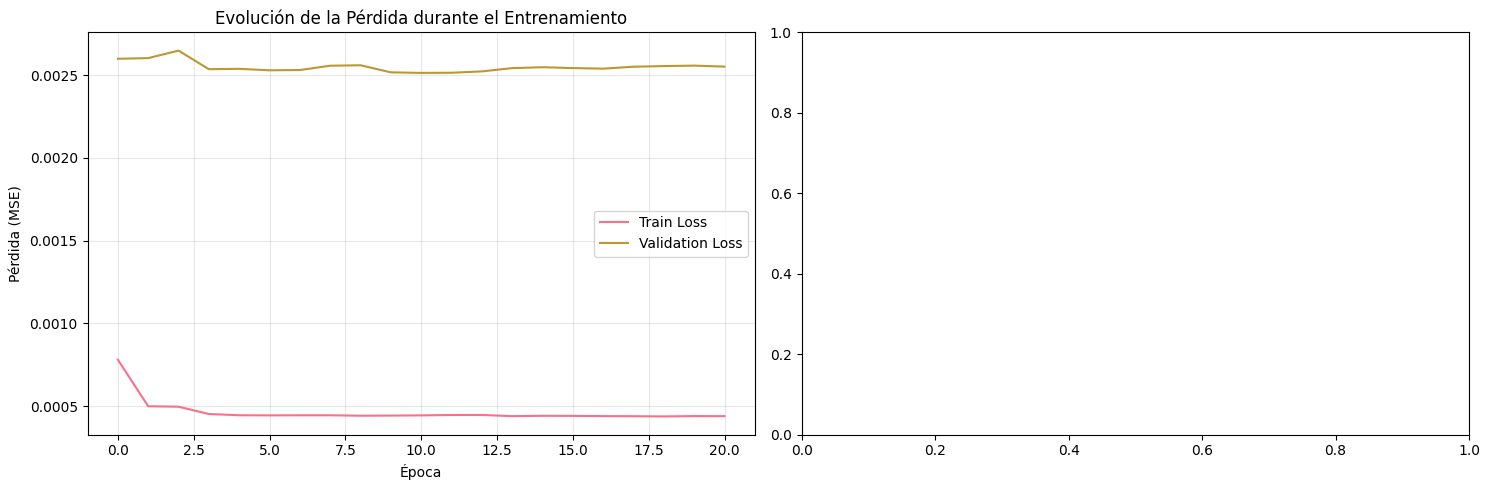


ANÁLISIS COMPARATIVO DE MODELOS


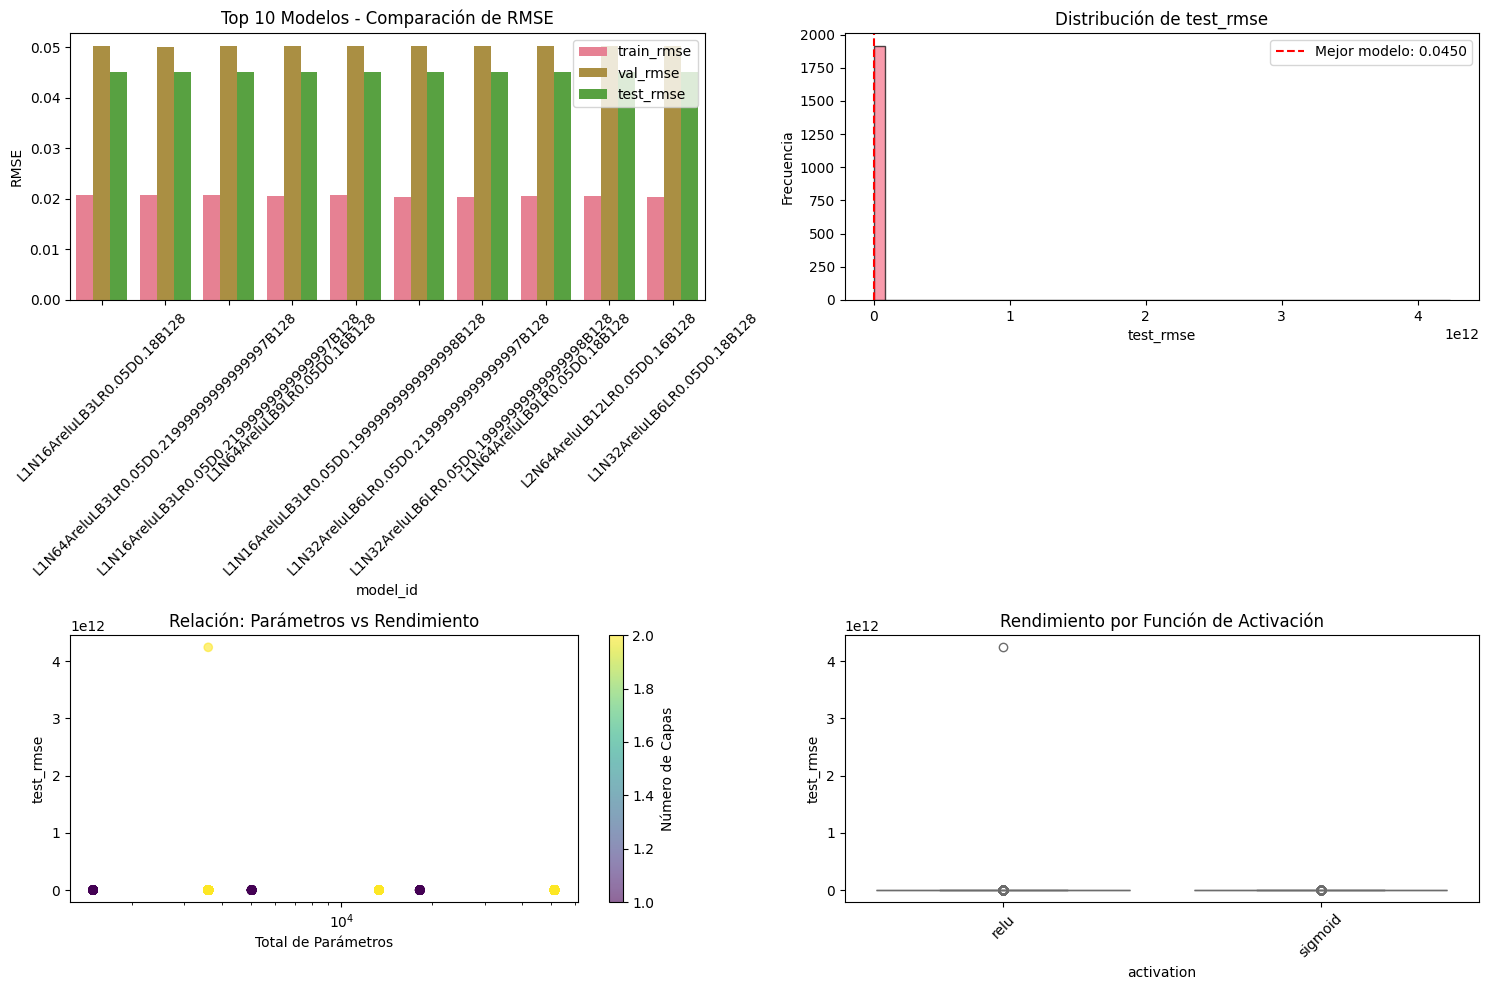


ANÁLISIS DE CORRELACIONES
Correlaciones con la métrica objetivo:
test_rmse              1.000000
test_mse               1.000000
test_mae               1.000000
test_mape              1.000000
final_val_loss         0.999789
final_learning_rate    0.037675
learning_rate          0.037675
dropout                0.012815
epochs_trained         0.011023
final_train_loss       0.007223
Name: test_rmse, dtype: float64


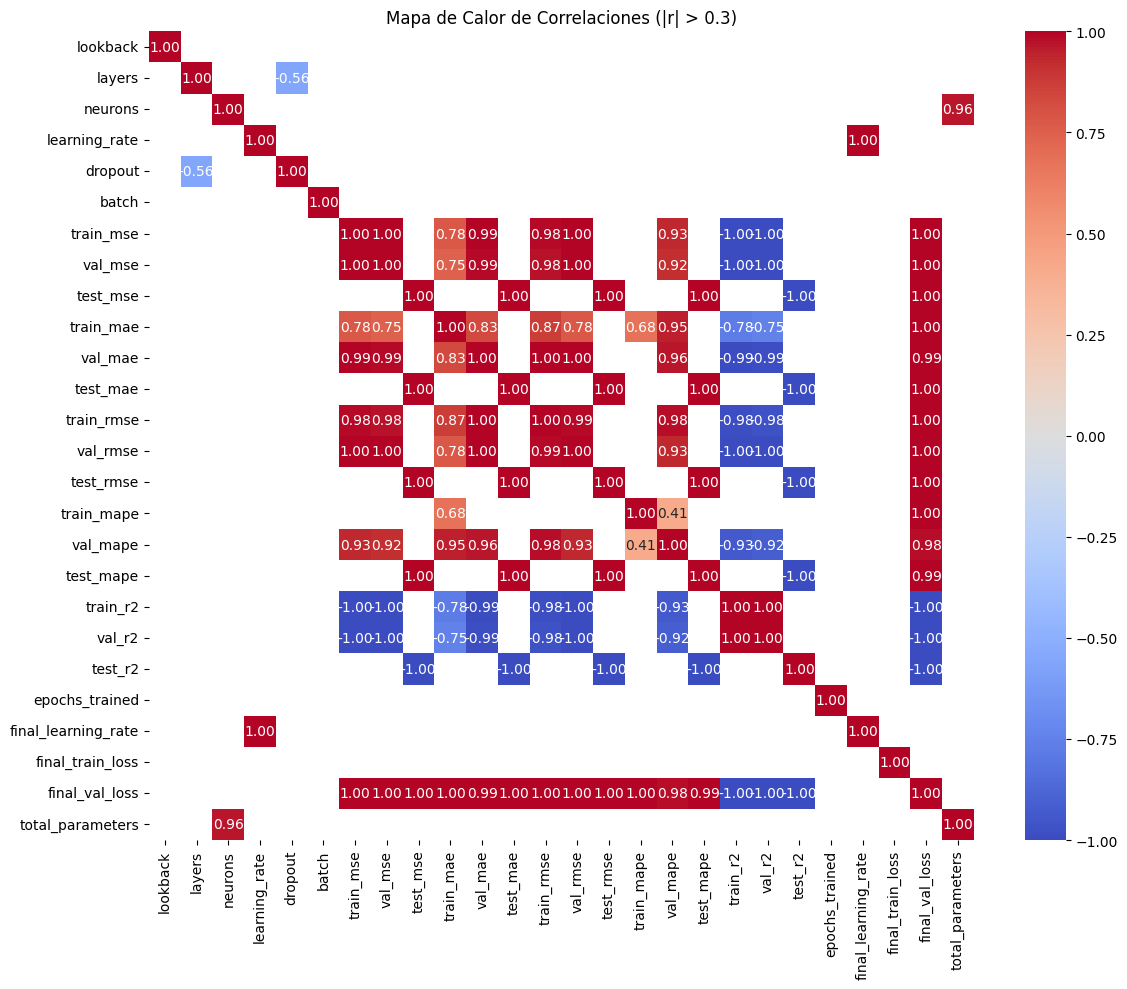


RESUMEN ESTADÍSTICO
Métrica analizada: test_rmse
Mejor valor: 0.044967
Peor valor: 4240000000000.000000
Media: 2210636365.237093
Desviación estándar: 96814755976.305588
Mediana: 0.045905

ANÁLISIS DE HIPERPARÁMETROS ÓPTIMOS
• lookback: correlación con test_rmse = -0.0046
• layers: correlación con test_rmse = 0.0052
• neurons: correlación con test_rmse = -0.0217
• Mejor activation: sigmoid
• learning_rate: correlación con test_rmse = 0.0377
• dropout: correlación con test_rmse = 0.0128
• batch: correlación con test_rmse = -0.0282


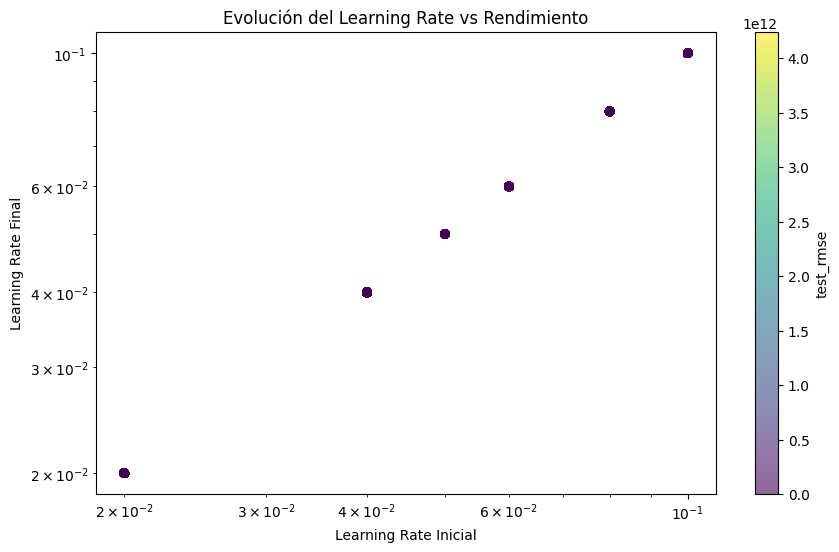


ANÁLISIS COMPLETADO


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

# Cargar el dataframe (asumiendo que ya está cargado como 'df')
# Si necesitas cargarlo desde un archivo:
# df = pd.read_csv('tu_archivo.csv')

# 1. Análisis del mejor modelo
print("=" * 50)
print("ANÁLISIS DEL MEJOR MODELO")
print("=" * 50)

# Métrica principal para evaluación (puedes cambiar esto)
metric = 'test_rmse'  # También puedes usar 'test_mse', 'test_mae', etc.

# Encontrar el mejor modelo según la métrica seleccionada
best_model_idx = df[metric].idxmin()
best_model = df.loc[best_model_idx]

print(f"Mejor modelo según {metric}:")
print(f"• Valor de {metric}: {best_model[metric]:.6f}")
print(f"• Model ID: {best_model['model_id']}")
print("\nHiperparámetros del mejor modelo:")
print(f"• Lookback: {best_model['lookback']}")
print(f"• Capas: {best_model['layers']}")
print(f"• Neuronas: {best_model['neurons']}")
print(f"• Activación: {best_model['activation']}")
print(f"• Learning Rate: {best_model['learning_rate']}")
print(f"• Dropout: {best_model['dropout']}")
print(f"• Batch Size: {best_model['batch']}")
print(f"• Épocas entrenadas: {best_model['epochs_trained']}")
print(f"• Total parámetros: {best_model['total_parameters']:,}")

# 2. Gráfico de evolución del entrenamiento del mejor modelo
print("\n" + "=" * 50)
print("GRÁFICO DE EVOLUCIÓN DEL ENTRENAMIENTO")
print("=" * 50)

# Convertir la historia de entrenamiento (si está almacenada como string)
try:
    if isinstance(best_model['history'], str):
        history = literal_eval(best_model['history'])
    else:
        history = best_model['history']

    plt.figure(figsize=(15, 5))

    # Gráfico de pérdida (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.get('loss', []), label='Train Loss')
    plt.plot(history.get('val_loss', []), label='Validation Loss')
    plt.title('Evolución de la Pérdida durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida (MSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfico de MAE
    plt.subplot(1, 2, 2)
    if 'mae' in history:
        plt.plot(history.get('mae', []), label='Train MAE')
        plt.plot(history.get('val_mae', []), label='Validation MAE')
        plt.title('Evolución del MAE durante el Entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al graficar la historia: {e}")

# 3. Análisis comparativo de modelos
print("\n" + "=" * 50)
print("ANÁLISIS COMPARATIVO DE MODELOS")
print("=" * 50)

# Top 10 mejores modelos
top_models = df.nsmallest(10, metric)

plt.figure(figsize=(15, 10))

# Gráfico 1: Comparación de métricas del top 10
plt.subplot(2, 2, 1)
top_models_melted = top_models.melt(id_vars=['model_id'],
                                    value_vars=['train_rmse', 'val_rmse', 'test_rmse'],
                                    var_name='conjunto',
                                    value_name='RMSE')
sns.barplot(data=top_models_melted, x='model_id', y='RMSE', hue='conjunto')
plt.title('Top 10 Modelos - Comparación de RMSE')
plt.xticks(rotation=45)
plt.legend()

# Gráfico 2: Distribución de la métrica principal
plt.subplot(2, 2, 2)
plt.hist(df[metric], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(best_model[metric], color='red', linestyle='--',
            label=f'Mejor modelo: {best_model[metric]:.4f}')
plt.xlabel(metric)
plt.ylabel('Frecuencia')
plt.title(f'Distribución de {metric}')
plt.legend()

# Gráfico 3: Relación entre parámetros y rendimiento
plt.subplot(2, 2, 3)
scatter = plt.scatter(df['total_parameters'], df[metric],
                     c=df['layers'], alpha=0.6, cmap='viridis')
plt.colorbar(scatter, label='Número de Capas')
plt.xlabel('Total de Parámetros')
plt.ylabel(metric)
plt.title('Relación: Parámetros vs Rendimiento')
plt.xscale('log')

# Gráfico 4: Impacto del learning rate
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='activation', y=metric)
plt.title('Rendimiento por Función de Activación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Análisis de correlaciones
print("\n" + "=" * 50)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 50)

# Seleccionar columnas numéricas para correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Correlación con la métrica principal
correlation_with_target = correlation_matrix[metric].sort_values(ascending=False)
print("Correlaciones con la métrica objetivo:")
print(correlation_with_target.head(10))

# 5. Gráfico de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[(correlation_matrix > 0.3) | (correlation_matrix < -0.3)],
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Mapa de Calor de Correlaciones (|r| > 0.3)')
plt.tight_layout()
plt.show()

# 6. Resumen estadístico
print("\n" + "=" * 50)
print("RESUMEN ESTADÍSTICO")
print("=" * 50)

print(f"Métrica analizada: {metric}")
print(f"Mejor valor: {best_model[metric]:.6f}")
print(f"Peor valor: {df[metric].max():.6f}")
print(f"Media: {df[metric].mean():.6f}")
print(f"Desviación estándar: {df[metric].std():.6f}")
print(f"Mediana: {df[metric].median():.6f}")

# 7. Análisis de hiperparámetros óptimos
print("\n" + "=" * 50)
print("ANÁLISIS DE HIPERPARÁMETROS ÓPTIMOS")
print("=" * 50)

# Mejores hiperparámetros por categoría
hyperparams = ['lookback', 'layers', 'neurons', 'activation', 'learning_rate', 'dropout', 'batch']
for param in hyperparams:
    if df[param].dtype == 'object':
        # Para variables categóricas
        best_group = df.groupby(param)[metric].mean().idxmin()
        print(f"• Mejor {param}: {best_group}")
    else:
        # Para variables numéricas
        correlation = df[param].corr(df[metric])
        print(f"• {param}: correlación con {metric} = {correlation:.4f}")

# 8. Gráfico adicional: Evolución del learning rate si está disponible
if 'final_learning_rate' in df.columns and 'learning_rate' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['learning_rate'], df['final_learning_rate'],
                c=df[metric], cmap='viridis', alpha=0.6)
    plt.colorbar(label=metric)
    plt.xlabel('Learning Rate Inicial')
    plt.ylabel('Learning Rate Final')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Evolución del Learning Rate vs Rendimiento')
    plt.show()

print("\n" + "=" * 50)
print("ANÁLISIS COMPLETADO")
print("=" * 50)

ANÁLISIS DEL MEJOR MODELO BASADO EN MSE
MEJOR MODELO (Menor test_mse):
• test_mse: 0.002022
• train_mse: 0.000429
• val_mse: 0.002513
• Model ID: L1N16AreluLB3LR0.05D0.18B128

HIPERPARÁMETROS DEL MEJOR MODELO:
• Lookback: 3
• Capas: 1
• Neuronas: 16
• Activación: relu
• Learning Rate: 0.050000
• Dropout: 0.180
• Batch Size: 128
• Épocas entrenadas: 21
• Total parámetros: 1,489

EVOLUCIÓN DEL MSE DURANTE EL ENTRENAMIENTO


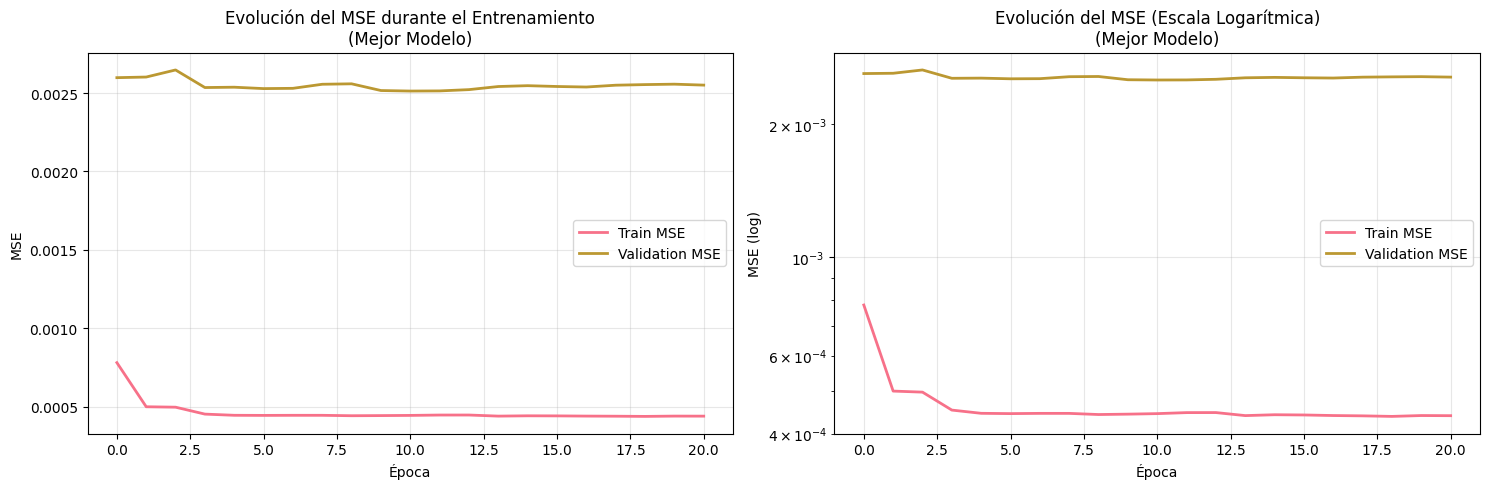


ANÁLISIS COMPARATIVO DE MSE


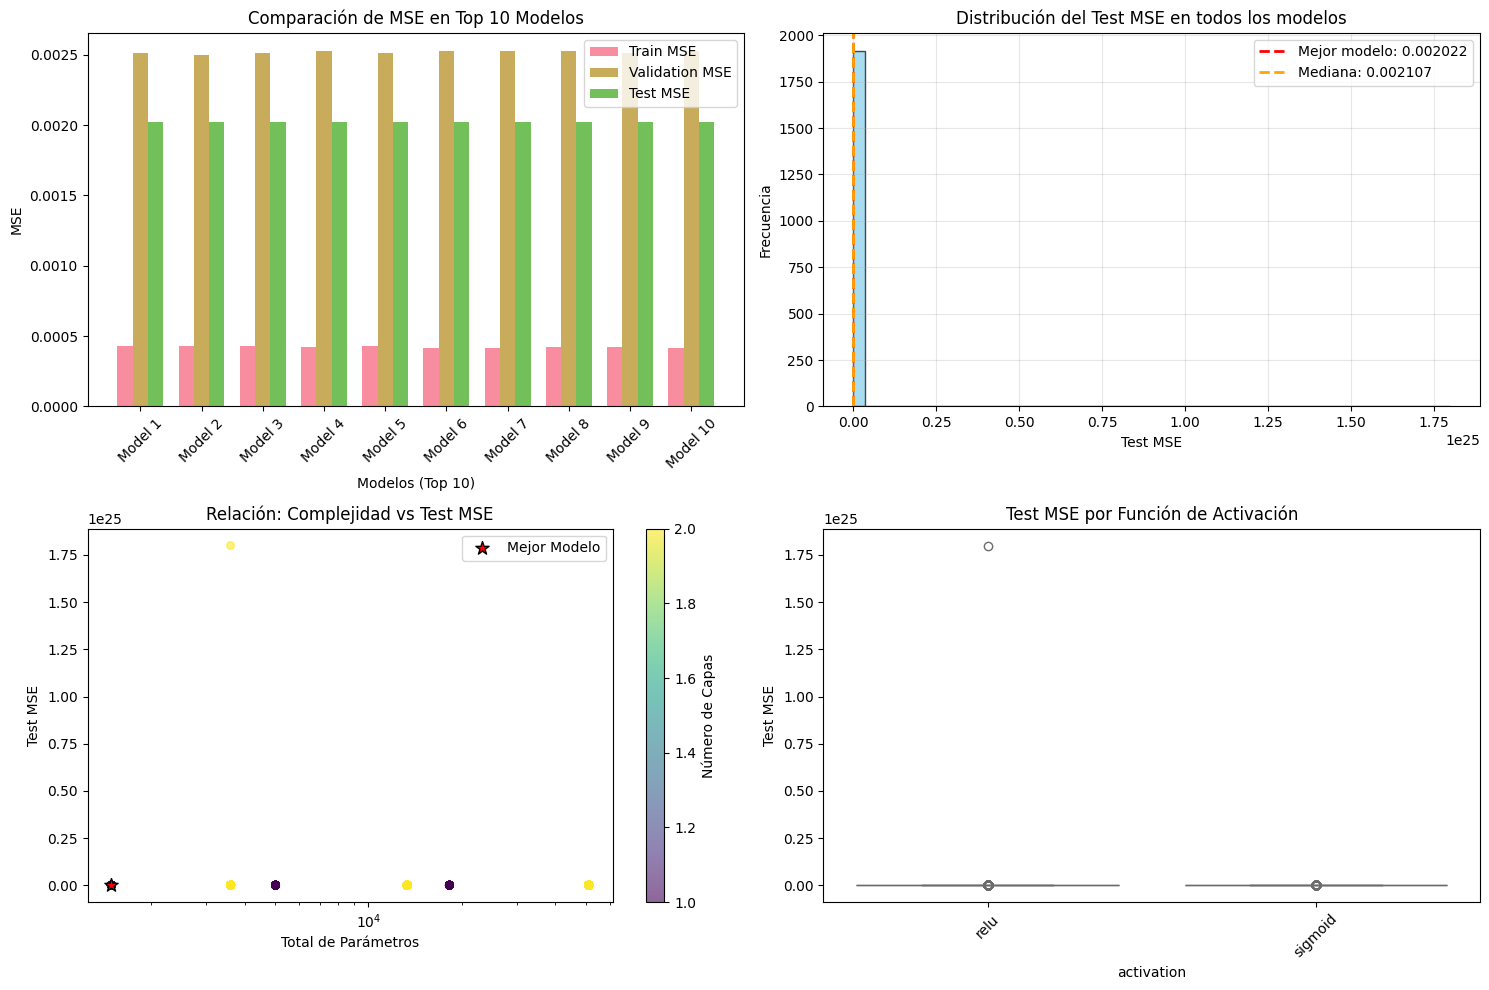


ANÁLISIS DE OVERFITTING (Basado en MSE)
Overfitting ratio del mejor modelo: 4.711
Overfitting ratio promedio: 10925131068335384952832.000
Modelos con overfitting severo (ratio > 2.0): 1894
Modelos con buen generalización (ratio < 1.2): 18


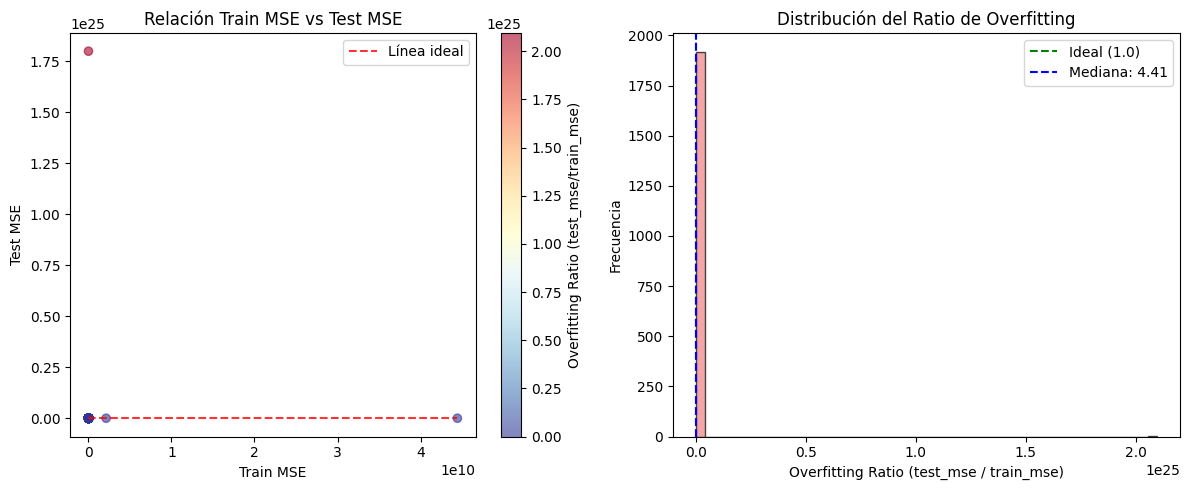


CORRELACIONES CON MSE
Variables más correlacionadas con test_mse:
                     test_mse
overfitting_ratio    1.000000
test_mse             1.000000
test_r2             -1.000000
test_rmse            1.000000
test_mae             1.000000
test_mape            1.000000
final_val_loss       0.999997
learning_rate        0.037675
final_learning_rate  0.037675
batch               -0.028207

MEJORES CONFIGURACIONES POR HIPERPARÁMETRO

Mejor test_mse por función de activación:
• relu: 0.002022
• sigmoid: 0.002031

Mejor test_mse por número de capas:
• 1 capas: 0.002022
• 2 capas: 0.002025

RESUMEN ESTADÍSTICO - MSE

TRAIN_MSE:
  Mejor: 0.000411
  Peor: 44443830116.000000
  Media: 24338181.375484
  Mediana: 0.000485
  Std: 1015952526.127518

VAL_MSE:
  Mejor: 0.002498
  Peor: 2880000000000.000000
  Media: 1512425229.375320
  Mediana: 0.002623
  Std: 65761617500.646072

TEST_MSE:
  Mejor: 0.002022
  Peor: 17999999999999998624268288.000000
  Media: 9384775808133588058112.000000
  Median

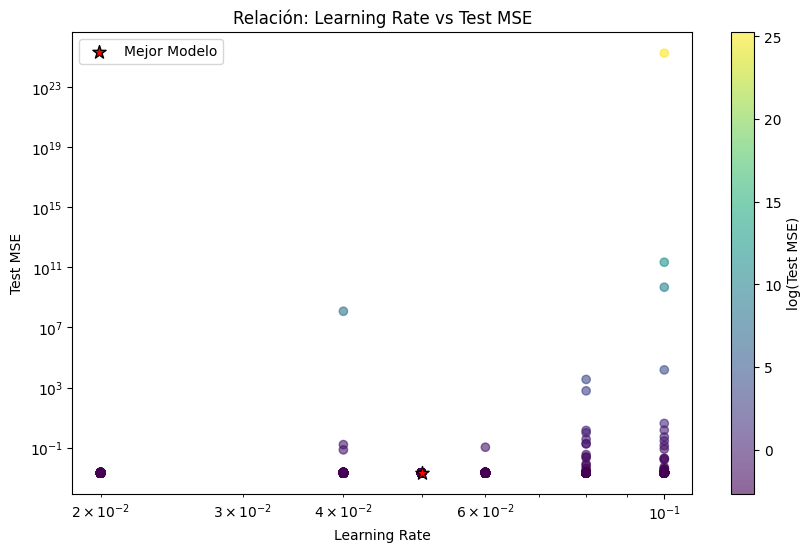


ANÁLISIS DE MSE COMPLETADO


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. Identificar el mejor modelo basado en MSE
print("=" * 60)
print("ANÁLISIS DEL MEJOR MODELO BASADO EN MSE")
print("=" * 60)

# Encontrar el mejor modelo según test_mse (menor es mejor)
best_model_idx = df['test_mse'].idxmin()
best_model = df.loc[best_model_idx]

print("MEJOR MODELO (Menor test_mse):")
print(f"• test_mse: {best_model['test_mse']:.6f}")
print(f"• train_mse: {best_model['train_mse']:.6f}")
print(f"• val_mse: {best_model['val_mse']:.6f}")
print(f"• Model ID: {best_model['model_id']}")

print("\nHIPERPARÁMETROS DEL MEJOR MODELO:")
print(f"• Lookback: {best_model['lookback']}")
print(f"• Capas: {best_model['layers']}")
print(f"• Neuronas: {best_model['neurons']}")
print(f"• Activación: {best_model['activation']}")
print(f"• Learning Rate: {best_model['learning_rate']:.6f}")
print(f"• Dropout: {best_model['dropout']:.3f}")
print(f"• Batch Size: {best_model['batch']}")
print(f"• Épocas entrenadas: {best_model['epochs_trained']}")
print(f"• Total parámetros: {best_model['total_parameters']:,}")

# 2. Gráficos de evolución del MSE durante entrenamiento del mejor modelo
print("\n" + "=" * 60)
print("EVOLUCIÓN DEL MSE DURANTE EL ENTRENAMIENTO")
print("=" * 60)

try:
    if isinstance(best_model['history'], str):
        history = literal_eval(best_model['history'])
    else:
        history = best_model['history']

    plt.figure(figsize=(15, 5))

    # Gráfico de MSE durante entrenamiento
    plt.subplot(1, 2, 1)
    if 'mse' in history:
        plt.plot(history['mse'], label='Train MSE', linewidth=2)
        plt.plot(history['val_mse'], label='Validation MSE', linewidth=2)
    else:
        # Si no hay 'mse' específico, usar 'loss' que normalmente es MSE
        plt.plot(history['loss'], label='Train MSE', linewidth=2)
        plt.plot(history['val_loss'], label='Validation MSE', linewidth=2)

    plt.title('Evolución del MSE durante el Entrenamiento\n(Mejor Modelo)')
    plt.xlabel('Época')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfico de MSE en escala logarítmica
    plt.subplot(1, 2, 2)
    if 'mse' in history:
        plt.semilogy(history['mse'], label='Train MSE', linewidth=2)
        plt.semilogy(history['val_mse'], label='Validation MSE', linewidth=2)
    else:
        plt.semilogy(history['loss'], label='Train MSE', linewidth=2)
        plt.semilogy(history['val_loss'], label='Validation MSE', linewidth=2)

    plt.title('Evolución del MSE (Escala Logarítmica)\n(Mejor Modelo)')
    plt.xlabel('Época')
    plt.ylabel('MSE (log)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al graficar la historia: {e}")

# 3. Análisis comparativo de MSE entre modelos
print("\n" + "=" * 60)
print("ANÁLISIS COMPARATIVO DE MSE")
print("=" * 60)

# Top 10 mejores modelos por test_mse
top_10_models = df.nsmallest(10, 'test_mse')

plt.figure(figsize=(15, 10))

# Gráfico 1: Comparación de MSE en los 10 mejores modelos
plt.subplot(2, 2, 1)
x_pos = np.arange(len(top_10_models))
width = 0.25

plt.bar(x_pos - width, top_10_models['train_mse'], width, label='Train MSE', alpha=0.8)
plt.bar(x_pos, top_10_models['val_mse'], width, label='Validation MSE', alpha=0.8)
plt.bar(x_pos + width, top_10_models['test_mse'], width, label='Test MSE', alpha=0.8)

plt.xlabel('Modelos (Top 10)')
plt.ylabel('MSE')
plt.title('Comparación de MSE en Top 10 Modelos')
plt.legend()
plt.xticks(x_pos, [f"Model {i+1}" for i in range(len(top_10_models))], rotation=45)

# Gráfico 2: Distribución del test_mse en todos los modelos
plt.subplot(2, 2, 2)
plt.hist(df['test_mse'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(best_model['test_mse'], color='red', linestyle='--', linewidth=2,
            label=f'Mejor modelo: {best_model["test_mse"]:.6f}')
plt.axvline(df['test_mse'].median(), color='orange', linestyle='--', linewidth=2,
            label=f'Mediana: {df["test_mse"].median():.6f}')
plt.xlabel('Test MSE')
plt.ylabel('Frecuencia')
plt.title('Distribución del Test MSE en todos los modelos')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Relación entre complejidad del modelo y MSE
plt.subplot(2, 2, 3)
scatter = plt.scatter(df['total_parameters'], df['test_mse'],
                     c=df['layers'], alpha=0.6, cmap='viridis', s=30)
plt.colorbar(scatter, label='Número de Capas')
plt.scatter(best_model['total_parameters'], best_model['test_mse'],
           color='red', s=100, marker='*', label='Mejor Modelo', edgecolor='black')
plt.xlabel('Total de Parámetros')
plt.ylabel('Test MSE')
plt.title('Relación: Complejidad vs Test MSE')
plt.xscale('log')
plt.legend()

# Gráfico 4: MSE por función de activación
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='activation', y='test_mse')
plt.title('Test MSE por Función de Activación')
plt.xticks(rotation=45)
plt.ylabel('Test MSE')

plt.tight_layout()
plt.show()

# 4. Análisis de overfitting basado en MSE
print("\n" + "=" * 60)
print("ANÁLISIS DE OVERFITTING (Basado en MSE)")
print("=" * 60)

# Calcular ratio de overfitting (test_mse / train_mse)
df['overfitting_ratio'] = df['test_mse'] / df['train_mse']

print(f"Overfitting ratio del mejor modelo: {df.loc[best_model_idx, 'overfitting_ratio']:.3f}")
print(f"Overfitting ratio promedio: {df['overfitting_ratio'].mean():.3f}")
print(f"Modelos con overfitting severo (ratio > 2.0): {(df['overfitting_ratio'] > 2.0).sum()}")
print(f"Modelos con buen generalización (ratio < 1.2): {(df['overfitting_ratio'] < 1.2).sum()}")

# 5. Gráfico de overfitting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['train_mse'], df['test_mse'], alpha=0.6, c=df['overfitting_ratio'], cmap='RdYlBu_r')
plt.colorbar(label='Overfitting Ratio (test_mse/train_mse)')
plt.plot([df['train_mse'].min(), df['train_mse'].max()],
         [df['train_mse'].min(), df['train_mse'].max()], 'r--', alpha=0.8, label='Línea ideal')
plt.xlabel('Train MSE')
plt.ylabel('Test MSE')
plt.title('Relación Train MSE vs Test MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['overfitting_ratio'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(1.0, color='green', linestyle='--', label='Ideal (1.0)')
plt.axvline(df['overfitting_ratio'].median(), color='blue', linestyle='--',
            label=f'Mediana: {df["overfitting_ratio"].median():.2f}')
plt.xlabel('Overfitting Ratio (test_mse / train_mse)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ratio de Overfitting')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Análisis de correlaciones con MSE
print("\n" + "=" * 60)
print("CORRELACIONES CON MSE")
print("=" * 60)

# Calcular correlaciones con las métricas de MSE
mse_correlations = df.corr(numeric_only=True)[['train_mse', 'val_mse', 'test_mse']].sort_values('test_mse', key=abs, ascending=False)

print("Variables más correlacionadas con test_mse:")
print(mse_correlations[['test_mse']].head(10))

# 7. Mejores modelos por categoría de hiperparámetros
print("\n" + "=" * 60)
print("MEJORES CONFIGURACIONES POR HIPERPARÁMETRO")
print("=" * 60)

# Analizar mejores configuraciones por tipo de activación
print("\nMejor test_mse por función de activación:")
best_by_activation = df.groupby('activation')['test_mse'].min().sort_values()
for activation, mse in best_by_activation.items():
    print(f"• {activation}: {mse:.6f}")

# Analizar por número de capas
print("\nMejor test_mse por número de capas:")
best_by_layers = df.groupby('layers')['test_mse'].min().sort_values()
for layers, mse in best_by_layers.items():
    print(f"• {layers} capas: {mse:.6f}")

# 8. Resumen estadístico del MSE
print("\n" + "=" * 60)
print("RESUMEN ESTADÍSTICO - MSE")
print("=" * 60)

for mse_type in ['train_mse', 'val_mse', 'test_mse']:
    print(f"\n{mse_type.upper()}:")
    print(f"  Mejor: {df[mse_type].min():.6f}")
    print(f"  Peor: {df[mse_type].max():.6f}")
    print(f"  Media: {df[mse_type].mean():.6f}")
    print(f"  Mediana: {df[mse_type].median():.6f}")
    print(f"  Std: {df[mse_type].std():.6f}")

# 9. Gráfico final: Evolución del learning rate vs MSE
if 'final_learning_rate' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['learning_rate'], df['test_mse'],
                alpha=0.6, c=np.log10(df['test_mse']), cmap='viridis')
    plt.colorbar(label='log(Test MSE)')
    plt.scatter(best_model['learning_rate'], best_model['test_mse'],
               color='red', s=100, marker='*', label='Mejor Modelo', edgecolor='black')
    plt.xlabel('Learning Rate')
    plt.ylabel('Test MSE')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Relación: Learning Rate vs Test MSE')
    plt.legend()
    plt.show()

print("\n" + "=" * 60)
print("ANÁLISIS DE MSE COMPLETADO")
print("=" * 60)


🏆 MEJOR MODELO (VAL_MSE)
model_id            L1N64AreluLB3LR0.05D0.21999999999999997B128
val_mse                                                0.002498
test_mse                                               0.002023
layers                                                        1
neurons                                                      64
lookback                                                      3
learning_rate                                              0.05
dropout                                                    0.22
batch                                                       128
total_parameters                                          18241
Name: 1745, dtype: object

🏆 MEJOR MODELO (TEST_MSE)
model_id            L1N16AreluLB3LR0.05D0.18B128
val_mse                                 0.002513
test_mse                                0.002022
layers                                         1
neurons                                       16
lookback                            

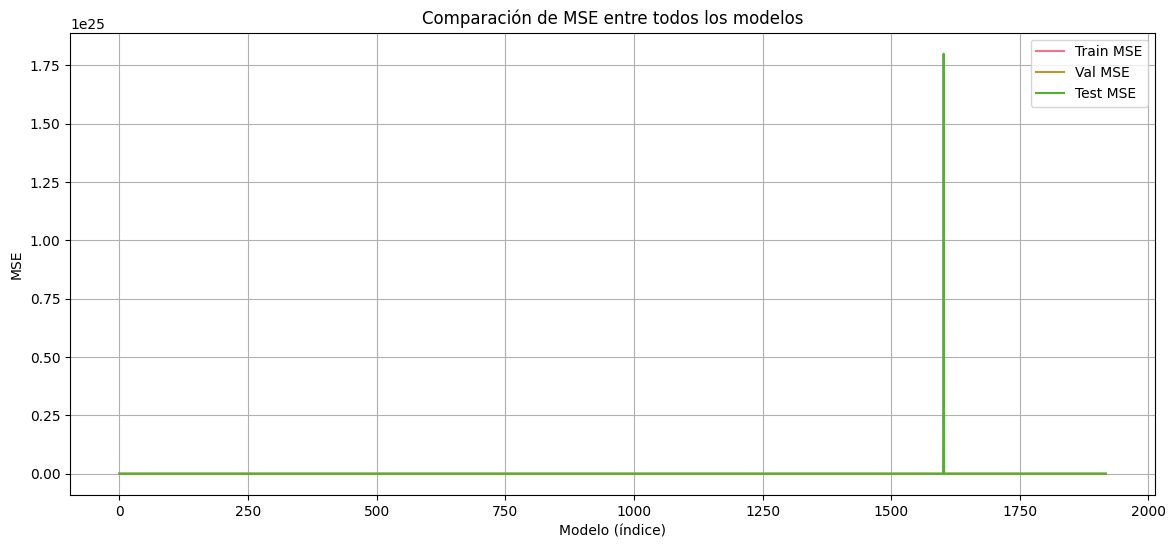

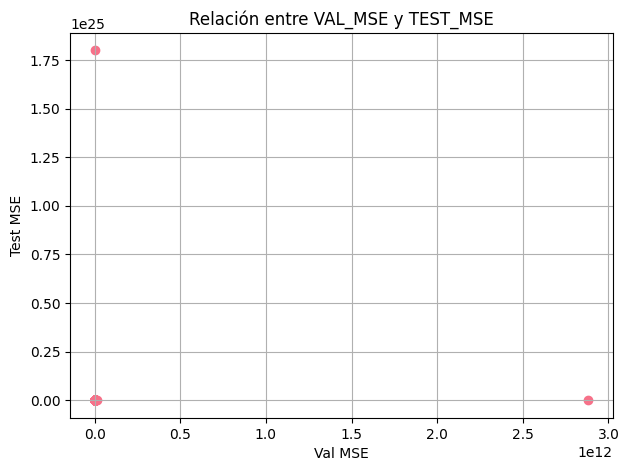

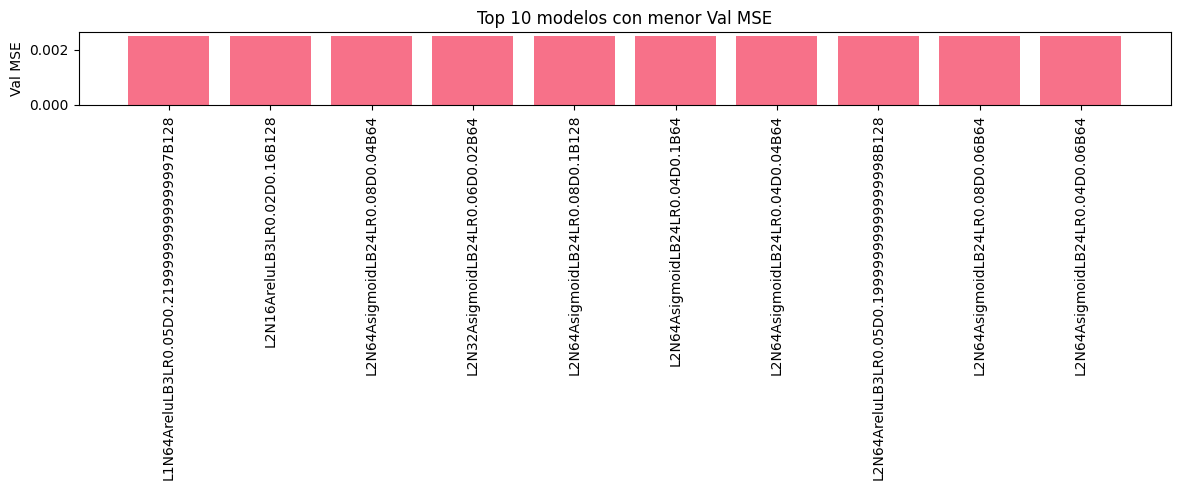


📌 Análisis de Overfitting
Promedio ratio Val/Train MSE: 5.65
Modelos con overfitting alto (ratio > 1.5): 1900


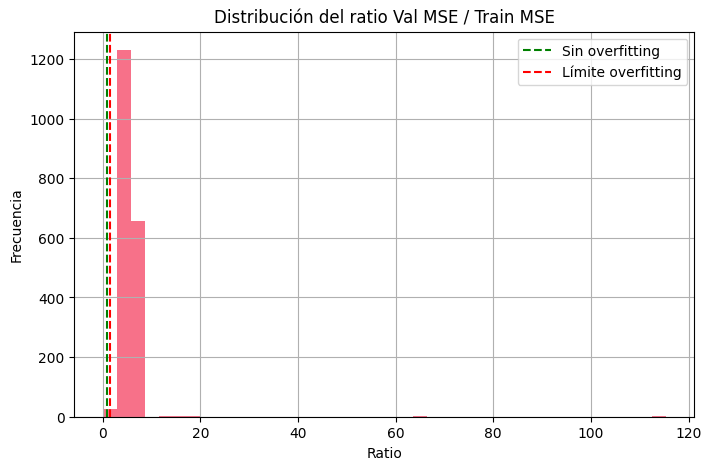

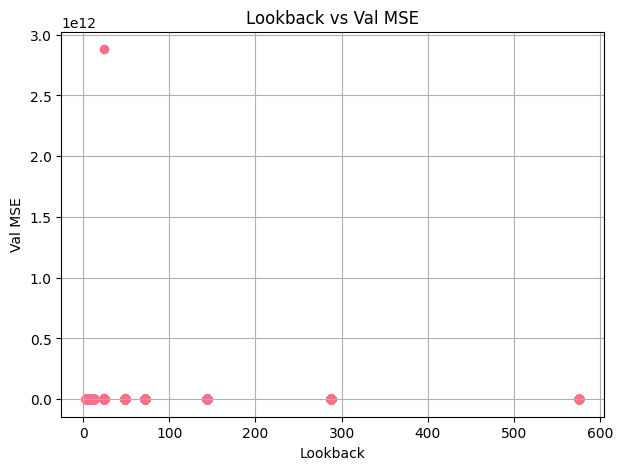

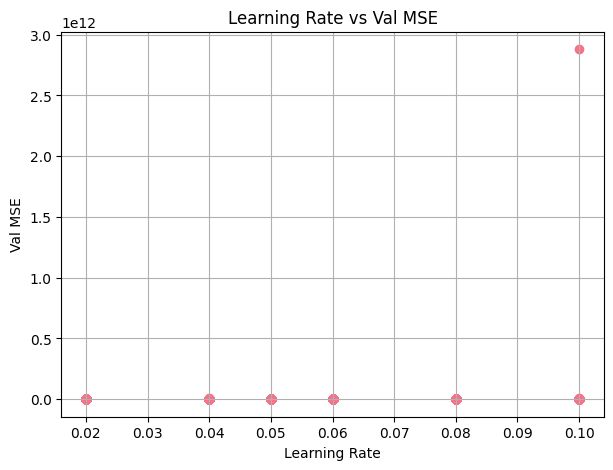

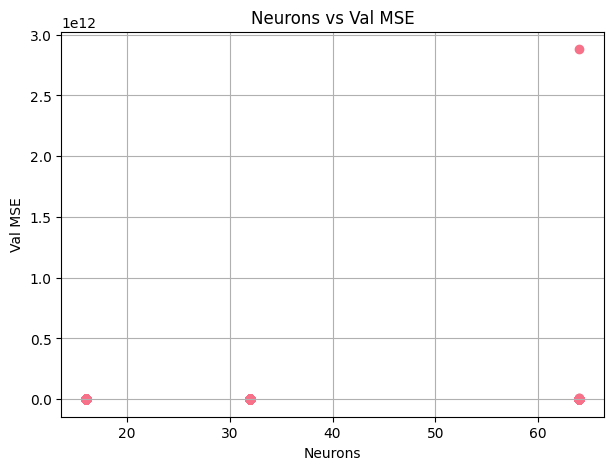

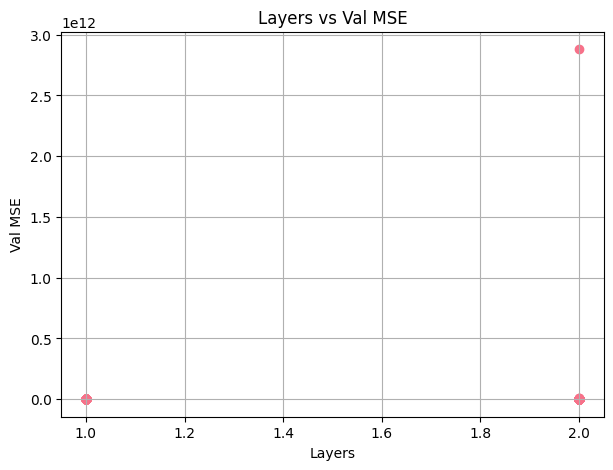


🔍 Hiperparámetros del TOP-10
                                         model_id  lookback  layers  neurons  \
1745  L1N64AreluLB3LR0.05D0.21999999999999997B128         3       1       64   
1725                 L2N16AreluLB3LR0.02D0.16B128         3       2       16   
1439              L2N64AsigmoidLB24LR0.08D0.04B64        24       2       64   
1388              L2N32AsigmoidLB24LR0.06D0.02B64        24       2       32   
758               L2N64AsigmoidLB24LR0.08D0.1B128        24       2       64   
1432               L2N64AsigmoidLB24LR0.04D0.1B64        24       2       64   
1429              L2N64AsigmoidLB24LR0.04D0.04B64        24       2       64   
1768  L2N64AreluLB3LR0.05D0.19999999999999998B128         3       2       64   
1440              L2N64AsigmoidLB24LR0.08D0.06B64        24       2       64   
1430              L2N64AsigmoidLB24LR0.04D0.06B64        24       2       64   

      learning_rate  dropout  batch   val_mse  
1745           0.05     0.22    128  0.00

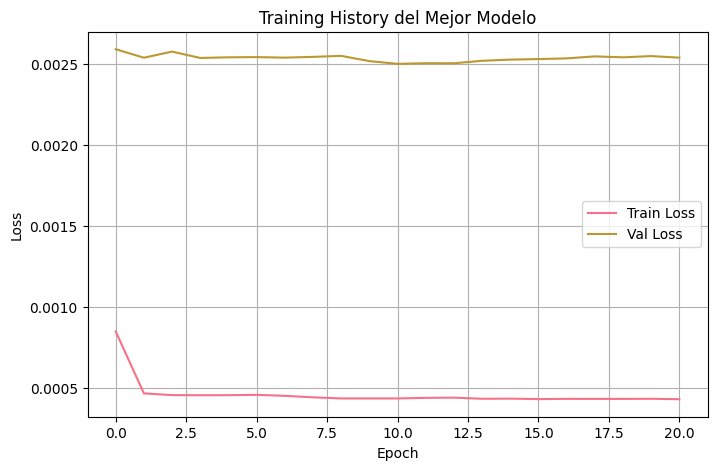


📈 Matriz de correlación MSE
           train_mse   val_mse  test_mse
train_mse   1.000000  0.998988 -0.000547
val_mse     0.998988  1.000000 -0.000525
test_mse   -0.000547 -0.000525  1.000000


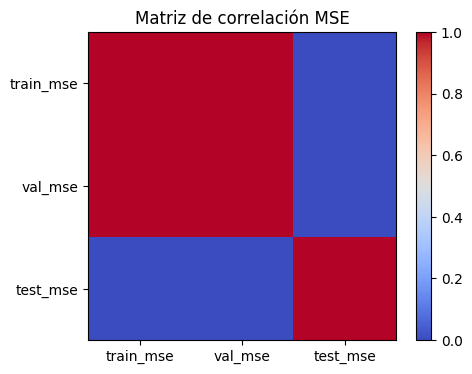

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# ============================================
# 0. SUPONER QUE EL DATAFRAME YA SE LLAMA df
# ============================================

# ============================================
# 1. Mejor modelo por validación y test
# ============================================

best_val = df.loc[df['val_mse'].idxmin()]
best_test = df.loc[df['test_mse'].idxmin()]

print("\n============================")
print("🏆 MEJOR MODELO (VAL_MSE)")
print("============================")
print(best_val[['model_id','val_mse','test_mse','layers','neurons','lookback',
                'learning_rate','dropout','batch','total_parameters']])

print("\n============================")
print("🏆 MEJOR MODELO (TEST_MSE)")
print("============================")
print(best_test[['model_id','val_mse','test_mse','layers','neurons','lookback',
                 'learning_rate','dropout','batch','total_parameters']])


# ============================================
# 2. GRÁFICAS GENERALES MSE
# ============================================

plt.figure(figsize=(14, 6))
plt.plot(df['train_mse'], label="Train MSE")
plt.plot(df['val_mse'], label="Val MSE")
plt.plot(df['test_mse'], label="Test MSE")
plt.title("Comparación de MSE entre todos los modelos")
plt.xlabel("Modelo (índice)")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

# Scatter val vs test
plt.figure(figsize=(7,5))
plt.scatter(df['val_mse'], df['test_mse'])
plt.xlabel("Val MSE")
plt.ylabel("Test MSE")
plt.title("Relación entre VAL_MSE y TEST_MSE")
plt.grid()
plt.show()

# Top 10 modelos por val_mse
top10 = df.nsmallest(10, 'val_mse')
plt.figure(figsize=(12,5))
plt.bar(top10['model_id'], top10['val_mse'])
plt.xticks(rotation=90)
plt.title("Top 10 modelos con menor Val MSE")
plt.ylabel("Val MSE")
plt.tight_layout()
plt.show()


# ============================================
# 3. ANÁLISIS DE OVERFITTING
# ============================================

df["mse_ratio"] = df["val_mse"] / df["train_mse"]
overfitting_threshold = 1.5  # se puede ajustar

print("\n============================")
print("📌 Análisis de Overfitting")
print("============================")
print(f"Promedio ratio Val/Train MSE: {df['mse_ratio'].mean():.2f}")

high_overfit = df[df["mse_ratio"] > overfitting_threshold]
print(f"Modelos con overfitting alto (ratio > {overfitting_threshold}): {len(high_overfit)}")

plt.figure(figsize=(8,5))
plt.hist(df["mse_ratio"], bins=40)
plt.axvline(1.0, color='green', linestyle='--', label="Sin overfitting")
plt.axvline(overfitting_threshold, color='red', linestyle='--', label="Límite overfitting")
plt.title("Distribución del ratio Val MSE / Train MSE")
plt.xlabel("Ratio")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()


# ============================================
# 4. ANÁLISIS DE HIPERPARÁMETROS ÓPTIMOS
# ============================================

# Relación lookback – val_mse
plt.figure(figsize=(7,5))
plt.scatter(df["lookback"], df["val_mse"])
plt.xlabel("Lookback")
plt.ylabel("Val MSE")
plt.title("Lookback vs Val MSE")
plt.grid()
plt.show()

# Relación learning_rate – val_mse
plt.figure(figsize=(7,5))
plt.scatter(df["learning_rate"], df["val_mse"])
plt.xlabel("Learning Rate")
plt.ylabel("Val MSE")
plt.title("Learning Rate vs Val MSE")
plt.grid()
plt.show()

# Relación neuronas – val_mse
plt.figure(figsize=(7,5))
plt.scatter(df["neurons"], df["val_mse"])
plt.xlabel("Neurons")
plt.ylabel("Val MSE")
plt.title("Neurons vs Val MSE")
plt.grid()
plt.show()

# Relación capas – val_mse
plt.figure(figsize=(7,5))
plt.scatter(df["layers"], df["val_mse"])
plt.xlabel("Layers")
plt.ylabel("Val MSE")
plt.title("Layers vs Val MSE")
plt.grid()
plt.show()

print("\n============================")
print("🔍 Hiperparámetros del TOP-10")
print("============================")
print(top10[["model_id","lookback","layers","neurons","learning_rate","dropout","batch","val_mse"]])


# ============================================
# 5. GRÁFICA DEL TRAINING HISTORY DEL MEJOR MODELO
# ============================================

def parse_history(history_str):
    """Convierte el string del history (guardado como texto) a dict."""
    try:
        return ast.literal_eval(history_str)
    except:
        return None

best_history = parse_history(best_val["history"])

if best_history and "loss" in best_history:
    plt.figure(figsize=(8,5))
    plt.plot(best_history["loss"], label="Train Loss")
    if "val_loss" in best_history:
        plt.plot(best_history["val_loss"], label="Val Loss")
    plt.title("Training History del Mejor Modelo")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("\n⚠ No se pudo interpretar el history del mejor modelo")


# ============================================
# 6. MATRIZ DE CORRELACIÓN SOLO MSE
# ============================================

mse_df = df[["train_mse","val_mse","test_mse"]]
corr = mse_df.corr()

print("\n============================")
print("📈 Matriz de correlación MSE")
print("============================")
print(corr)

plt.figure(figsize=(5,4))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(mse_df.columns)), mse_df.columns)
plt.yticks(range(len(mse_df.columns)), mse_df.columns)
plt.title("Matriz de correlación MSE")
plt.show()


ANÁLISIS DEL MEJOR MODELO BASADO EN MSE
MEJOR MODELO (Menor test_mse):
• test_mse: 0.002022
• train_mse: 0.000429
• val_mse: 0.002513
• Model ID: L1N16AreluLB3LR0.05D0.18B128

HIPERPARÁMETROS DEL MEJOR MODELO:
• Lookback: 3
• Capas: 1
• Neuronas: 16
• Activación: relu
• Learning Rate: 0.050000
• Dropout: 0.180
• Batch Size: 128
• Épocas entrenadas: 21
• Total parámetros: 1,489

EVOLUCIÓN DEL MSE DURANTE EL ENTRENAMIENTO


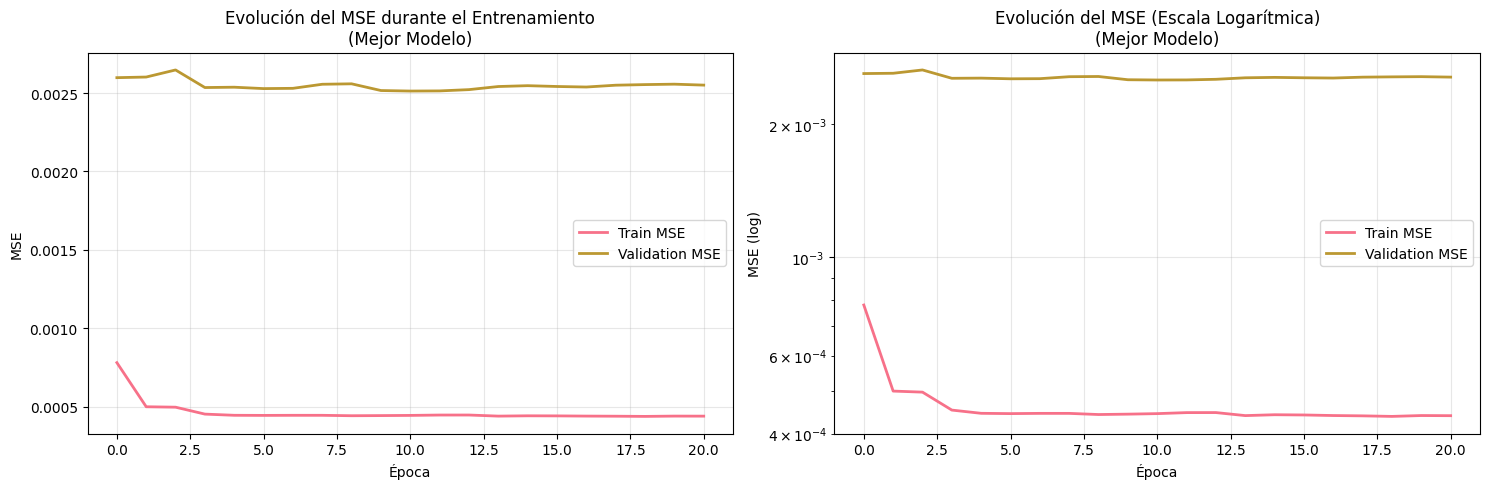


ANÁLISIS COMPARATIVO DE MSE


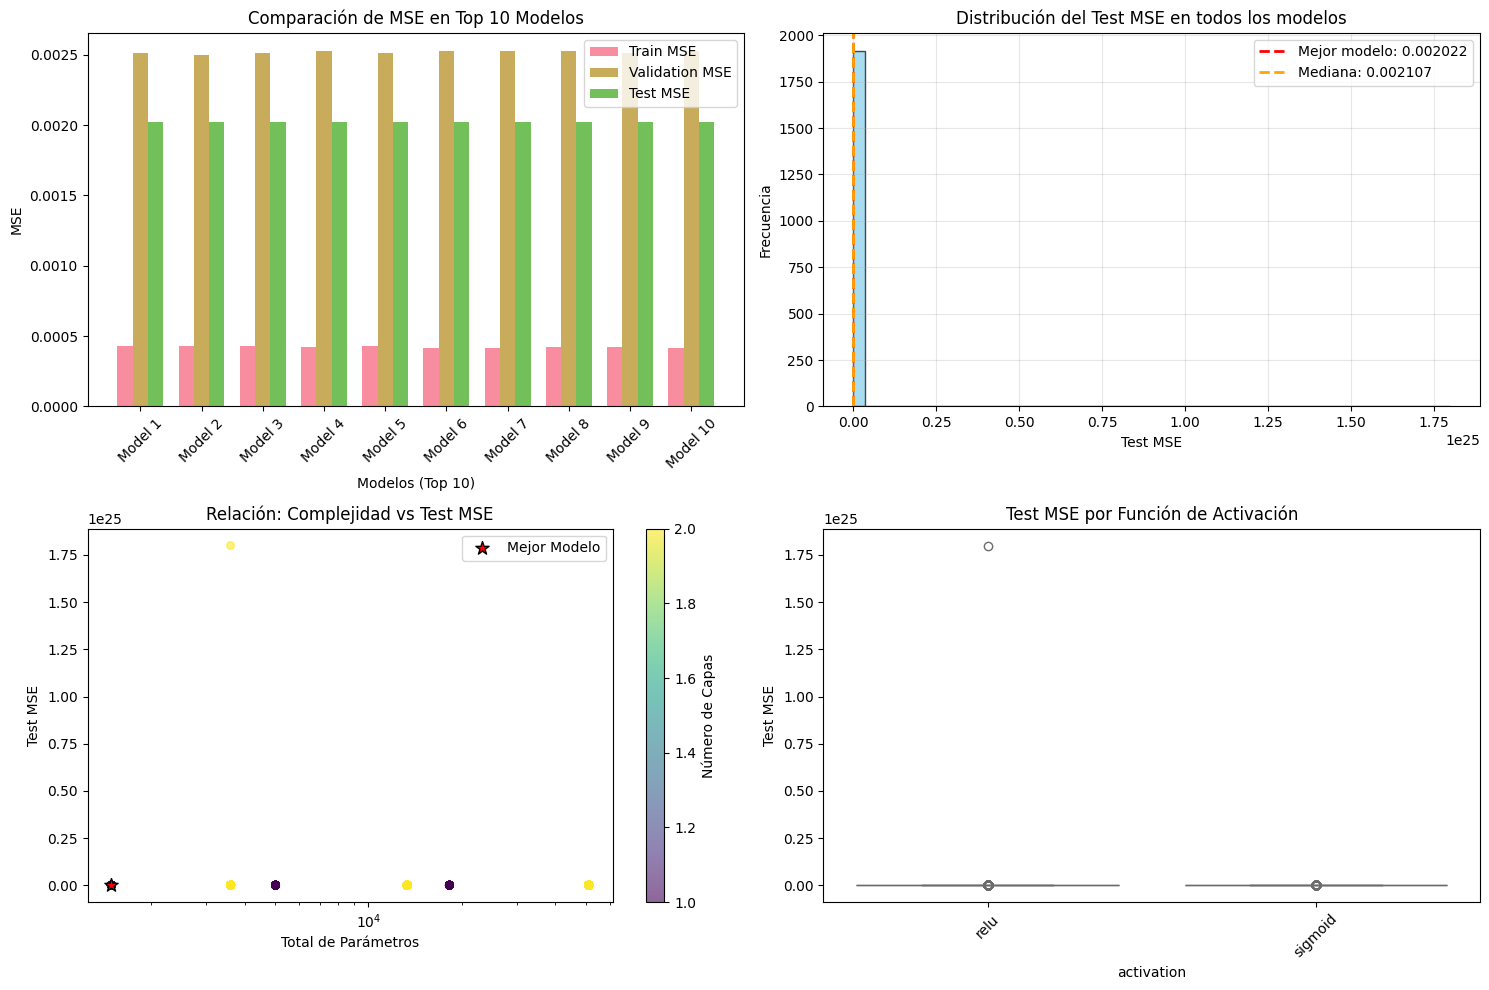


ANÁLISIS DE OVERFITTING (Basado en MSE)
Overfitting ratio del mejor modelo: 4.711
Overfitting ratio promedio: 10925131068335384952832.000
Modelos con overfitting severo (ratio > 2.0): 1894
Modelos con buen generalización (ratio < 1.2): 18


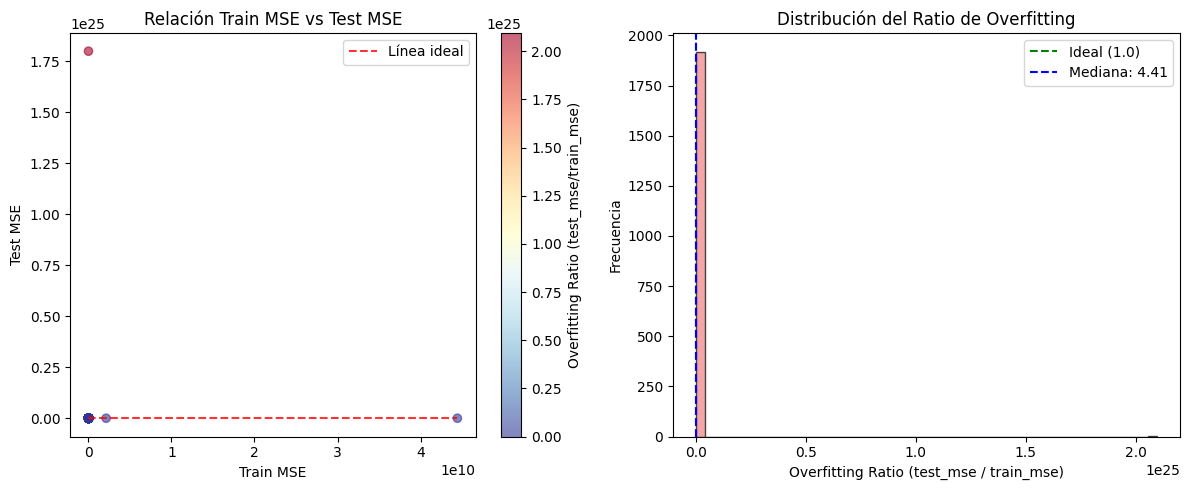


CORRELACIONES CON MSE
Variables más correlacionadas con test_mse:
                     test_mse
overfitting_ratio    1.000000
test_mse             1.000000
test_r2             -1.000000
test_rmse            1.000000
test_mae             1.000000
test_mape            1.000000
final_val_loss       0.999997
learning_rate        0.037675
final_learning_rate  0.037675
mse_ratio           -0.036154

MEJORES CONFIGURACIONES POR HIPERPARÁMETRO

Mejor test_mse por función de activación:
• relu: 0.002022
• sigmoid: 0.002031

Mejor test_mse por número de capas:
• 1 capas: 0.002022
• 2 capas: 0.002025

RESUMEN ESTADÍSTICO - MSE

TRAIN_MSE:
  Mejor: 0.000411
  Peor: 44443830116.000000
  Media: 24338181.375484
  Mediana: 0.000485
  Std: 1015952526.127518

VAL_MSE:
  Mejor: 0.002498
  Peor: 2880000000000.000000
  Media: 1512425229.375320
  Mediana: 0.002623
  Std: 65761617500.646072

TEST_MSE:
  Mejor: 0.002022
  Peor: 17999999999999998624268288.000000
  Media: 9384775808133588058112.000000
  Median

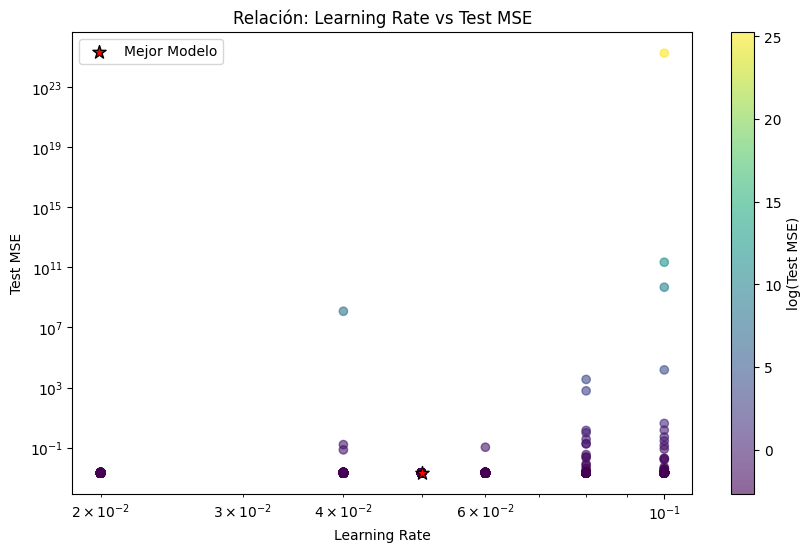


ANÁLISIS DE MSE COMPLETADO


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. Identificar el mejor modelo basado en MSE
print("=" * 60)
print("ANÁLISIS DEL MEJOR MODELO BASADO EN MSE")
print("=" * 60)

# Encontrar el mejor modelo según test_mse (menor es mejor)
best_model_idx = df['test_mse'].idxmin()
best_model = df.loc[best_model_idx]

print("MEJOR MODELO (Menor test_mse):")
print(f"• test_mse: {best_model['test_mse']:.6f}")
print(f"• train_mse: {best_model['train_mse']:.6f}")
print(f"• val_mse: {best_model['val_mse']:.6f}")
print(f"• Model ID: {best_model['model_id']}")

print("\nHIPERPARÁMETROS DEL MEJOR MODELO:")
print(f"• Lookback: {best_model['lookback']}")
print(f"• Capas: {best_model['layers']}")
print(f"• Neuronas: {best_model['neurons']}")
print(f"• Activación: {best_model['activation']}")
print(f"• Learning Rate: {best_model['learning_rate']:.6f}")
print(f"• Dropout: {best_model['dropout']:.3f}")
print(f"• Batch Size: {best_model['batch']}")
print(f"• Épocas entrenadas: {best_model['epochs_trained']}")
print(f"• Total parámetros: {best_model['total_parameters']:,}")

# 2. Gráficos de evolución del MSE durante entrenamiento del mejor modelo
print("\n" + "=" * 60)
print("EVOLUCIÓN DEL MSE DURANTE EL ENTRENAMIENTO")
print("=" * 60)

try:
    if isinstance(best_model['history'], str):
        history = literal_eval(best_model['history'])
    else:
        history = best_model['history']

    plt.figure(figsize=(15, 5))

    # Gráfico de MSE durante entrenamiento
    plt.subplot(1, 2, 1)
    if 'mse' in history:
        plt.plot(history['mse'], label='Train MSE', linewidth=2)
        plt.plot(history['val_mse'], label='Validation MSE', linewidth=2)
    else:
        # Si no hay 'mse' específico, usar 'loss' que normalmente es MSE
        plt.plot(history['loss'], label='Train MSE', linewidth=2)
        plt.plot(history['val_loss'], label='Validation MSE', linewidth=2)

    plt.title('Evolución del MSE durante el Entrenamiento\n(Mejor Modelo)')
    plt.xlabel('Época')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Gráfico de MSE en escala logarítmica
    plt.subplot(1, 2, 2)
    if 'mse' in history:
        plt.semilogy(history['mse'], label='Train MSE', linewidth=2)
        plt.semilogy(history['val_mse'], label='Validation MSE', linewidth=2)
    else:
        plt.semilogy(history['loss'], label='Train MSE', linewidth=2)
        plt.semilogy(history['val_loss'], label='Validation MSE', linewidth=2)

    plt.title('Evolución del MSE (Escala Logarítmica)\n(Mejor Modelo)')
    plt.xlabel('Época')
    plt.ylabel('MSE (log)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al graficar la historia: {e}")

# 3. Análisis comparativo de MSE entre modelos
print("\n" + "=" * 60)
print("ANÁLISIS COMPARATIVO DE MSE")
print("=" * 60)

# Top 10 mejores modelos por test_mse
top_10_models = df.nsmallest(10, 'test_mse')

plt.figure(figsize=(15, 10))

# Gráfico 1: Comparación de MSE en los 10 mejores modelos
plt.subplot(2, 2, 1)
x_pos = np.arange(len(top_10_models))
width = 0.25

plt.bar(x_pos - width, top_10_models['train_mse'], width, label='Train MSE', alpha=0.8)
plt.bar(x_pos, top_10_models['val_mse'], width, label='Validation MSE', alpha=0.8)
plt.bar(x_pos + width, top_10_models['test_mse'], width, label='Test MSE', alpha=0.8)

plt.xlabel('Modelos (Top 10)')
plt.ylabel('MSE')
plt.title('Comparación de MSE en Top 10 Modelos')
plt.legend()
plt.xticks(x_pos, [f"Model {i+1}" for i in range(len(top_10_models))], rotation=45)

# Gráfico 2: Distribución del test_mse en todos los modelos
plt.subplot(2, 2, 2)
plt.hist(df['test_mse'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(best_model['test_mse'], color='red', linestyle='--', linewidth=2,
            label=f'Mejor modelo: {best_model["test_mse"]:.6f}')
plt.axvline(df['test_mse'].median(), color='orange', linestyle='--', linewidth=2,
            label=f'Mediana: {df["test_mse"].median():.6f}')
plt.xlabel('Test MSE')
plt.ylabel('Frecuencia')
plt.title('Distribución del Test MSE en todos los modelos')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Relación entre complejidad del modelo y MSE
plt.subplot(2, 2, 3)
scatter = plt.scatter(df['total_parameters'], df['test_mse'],
                     c=df['layers'], alpha=0.6, cmap='viridis', s=30)
plt.colorbar(scatter, label='Número de Capas')
plt.scatter(best_model['total_parameters'], best_model['test_mse'],
           color='red', s=100, marker='*', label='Mejor Modelo', edgecolor='black')
plt.xlabel('Total de Parámetros')
plt.ylabel('Test MSE')
plt.title('Relación: Complejidad vs Test MSE')
plt.xscale('log')
plt.legend()

# Gráfico 4: MSE por función de activación
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='activation', y='test_mse')
plt.title('Test MSE por Función de Activación')
plt.xticks(rotation=45)
plt.ylabel('Test MSE')

plt.tight_layout()
plt.show()

# 4. Análisis de overfitting basado en MSE
print("\n" + "=" * 60)
print("ANÁLISIS DE OVERFITTING (Basado en MSE)")
print("=" * 60)

# Calcular ratio de overfitting (test_mse / train_mse)
df['overfitting_ratio'] = df['test_mse'] / df['train_mse']

print(f"Overfitting ratio del mejor modelo: {df.loc[best_model_idx, 'overfitting_ratio']:.3f}")
print(f"Overfitting ratio promedio: {df['overfitting_ratio'].mean():.3f}")
print(f"Modelos con overfitting severo (ratio > 2.0): {(df['overfitting_ratio'] > 2.0).sum()}")
print(f"Modelos con buen generalización (ratio < 1.2): {(df['overfitting_ratio'] < 1.2).sum()}")

# 5. Gráfico de overfitting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['train_mse'], df['test_mse'], alpha=0.6, c=df['overfitting_ratio'], cmap='RdYlBu_r')
plt.colorbar(label='Overfitting Ratio (test_mse/train_mse)')
plt.plot([df['train_mse'].min(), df['train_mse'].max()],
         [df['train_mse'].min(), df['train_mse'].max()], 'r--', alpha=0.8, label='Línea ideal')
plt.xlabel('Train MSE')
plt.ylabel('Test MSE')
plt.title('Relación Train MSE vs Test MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['overfitting_ratio'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(1.0, color='green', linestyle='--', label='Ideal (1.0)')
plt.axvline(df['overfitting_ratio'].median(), color='blue', linestyle='--',
            label=f'Mediana: {df["overfitting_ratio"].median():.2f}')
plt.xlabel('Overfitting Ratio (test_mse / train_mse)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ratio de Overfitting')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Análisis de correlaciones con MSE
print("\n" + "=" * 60)
print("CORRELACIONES CON MSE")
print("=" * 60)

# Calcular correlaciones con las métricas de MSE
mse_correlations = df.corr(numeric_only=True)[['train_mse', 'val_mse', 'test_mse']].sort_values('test_mse', key=abs, ascending=False)

print("Variables más correlacionadas con test_mse:")
print(mse_correlations[['test_mse']].head(10))

# 7. Mejores modelos por categoría de hiperparámetros
print("\n" + "=" * 60)
print("MEJORES CONFIGURACIONES POR HIPERPARÁMETRO")
print("=" * 60)

# Analizar mejores configuraciones por tipo de activación
print("\nMejor test_mse por función de activación:")
best_by_activation = df.groupby('activation')['test_mse'].min().sort_values()
for activation, mse in best_by_activation.items():
    print(f"• {activation}: {mse:.6f}")

# Analizar por número de capas
print("\nMejor test_mse por número de capas:")
best_by_layers = df.groupby('layers')['test_mse'].min().sort_values()
for layers, mse in best_by_layers.items():
    print(f"• {layers} capas: {mse:.6f}")

# 8. Resumen estadístico del MSE
print("\n" + "=" * 60)
print("RESUMEN ESTADÍSTICO - MSE")
print("=" * 60)

for mse_type in ['train_mse', 'val_mse', 'test_mse']:
    print(f"\n{mse_type.upper()}:")
    print(f"  Mejor: {df[mse_type].min():.6f}")
    print(f"  Peor: {df[mse_type].max():.6f}")
    print(f"  Media: {df[mse_type].mean():.6f}")
    print(f"  Mediana: {df[mse_type].median():.6f}")
    print(f"  Std: {df[mse_type].std():.6f}")

# 9. Gráfico final: Evolución del learning rate vs MSE
if 'final_learning_rate' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['learning_rate'], df['test_mse'],
                alpha=0.6, c=np.log10(df['test_mse']), cmap='viridis')
    plt.colorbar(label='log(Test MSE)')
    plt.scatter(best_model['learning_rate'], best_model['test_mse'],
               color='red', s=100, marker='*', label='Mejor Modelo', edgecolor='black')
    plt.xlabel('Learning Rate')
    plt.ylabel('Test MSE')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Relación: Learning Rate vs Test MSE')
    plt.legend()
    plt.show()

print("\n" + "=" * 60)
print("ANÁLISIS DE MSE COMPLETADO")
print("=" * 60)